In [12]:
# ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìÂíåÂõæÂΩ¢Ê†∑Âºè - ‰øÆÂ§çÁâàÊú¨
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'DejaVu Sans']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# ËÆæÁΩÆÂõæÂΩ¢Ê†∑Âºè
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ËÆæÁΩÆÊòæÁ§∫Á≤æÂ∫¶
pd.set_option('display.precision', 6)
np.set_printoptions(precision=6, suppress=True)

print("Â∫ìÂØºÂÖ•ÊàêÂäüÔºÅ‰∏≠ÊñáÂ≠ó‰ΩìËÆæÁΩÆÂÆåÊàêÔºÅ")

Â∫ìÂØºÂÖ•ÊàêÂäüÔºÅ‰∏≠ÊñáÂ≠ó‰ΩìËÆæÁΩÆÂÆåÊàêÔºÅ


In [2]:
# Êï∞ÊçÆÂä†ËΩΩÂíåÈ¢ÑÂ§ÑÁêÜ
def load_and_preprocess_data():
    """Âä†ËΩΩÂíåÈ¢ÑÂ§ÑÁêÜNIPTÊï∞ÊçÆ"""
    print("Âä†ËΩΩNIPTÊï∞ÊçÆ...")
    df = pd.read_csv('CUMCM2025Problems/CÈ¢ò/boy.csv', encoding='gbk')
    
    # Â§ÑÁêÜÂ§öÊ¨°Ê£ÄÊµãÔºöÂØπÂêå‰∏ÄÂ≠ïÂ¶áÂêå‰∏ÄÊ¨°ÈááË°ÄÁöÑÂ§öÊ¨°Ê£ÄÊµãÂèñÂπ≥ÂùáÂÄº
    df_agg = df.groupby(['Â≠ïÂ¶á‰ª£Á†Å', 'Ê£ÄÊµãÊäΩË°ÄÊ¨°Êï∞']).agg({
        'Âπ¥ÈæÑ': 'first',
        'Ë∫´È´ò': 'first', 
        '‰ΩìÈáç': 'mean',
        'Ê£ÄÊµãÂ≠ïÂë®': 'first',
        'Â≠ïÂ¶áBMI': 'mean',
        'YÊüìËâ≤‰ΩìÊµìÂ∫¶': 'mean',
        'YÊüìËâ≤‰ΩìÁöÑZÂÄº': 'mean'
    }).reset_index()
    
    # Á≠õÈÄâÊúâÊïàÊï∞ÊçÆÔºöYÊüìËâ≤‰ΩìÊµìÂ∫¶ÈùûÁ©∫‰∏îÂ§ß‰∫é0
    df_valid = df_agg[(df_agg['YÊüìËâ≤‰ΩìÊµìÂ∫¶'] > 0) & (df_agg['YÊüìËâ≤‰ΩìÊµìÂ∫¶'].notna())]
    
    # ÊèêÂèñÂ≠ïÂë®Êï∞ÂÄº
    def extract_weeks(week_str):
        try:
            if 'w' in str(week_str):
                week_part = str(week_str).split('w')[0]
                day_part = str(week_str).split('+')[1] if '+' in str(week_str) else '0'
                return float(week_part) + float(day_part)/7
            return float(week_str)
        except:
            return np.nan
    
    df_valid['weeks'] = df_valid['Ê£ÄÊµãÂ≠ïÂë®'].apply(extract_weeks)
    df_valid = df_valid.dropna(subset=['weeks', 'Â≠ïÂ¶áBMI', 'YÊüìËâ≤‰ΩìÊµìÂ∫¶'])
    
    print(f"Êï∞ÊçÆÂä†ËΩΩÂÆåÊàêÔºåÊúâÊïàÊ†∑Êú¨Êï∞: {len(df_valid)}")
    return df_valid

# Âä†ËΩΩÊï∞ÊçÆ
df = load_and_preprocess_data()
print(f"Êï∞ÊçÆÂü∫Êú¨‰ø°ÊÅØ: {df.shape}")
print(f"YÊüìËâ≤‰ΩìÊµìÂ∫¶ËåÉÂõ¥: {df['YÊüìËâ≤‰ΩìÊµìÂ∫¶'].min():.6f} - {df['YÊüìËâ≤‰ΩìÊµìÂ∫¶'].max():.6f}")

Âä†ËΩΩNIPTÊï∞ÊçÆ...
Êï∞ÊçÆÂä†ËΩΩÂÆåÊàêÔºåÊúâÊïàÊ†∑Êú¨Êï∞: 1020
Êï∞ÊçÆÂü∫Êú¨‰ø°ÊÅØ: (1020, 10)
YÊüìËâ≤‰ΩìÊµìÂ∫¶ËåÉÂõ¥: 0.010004 - 0.234218


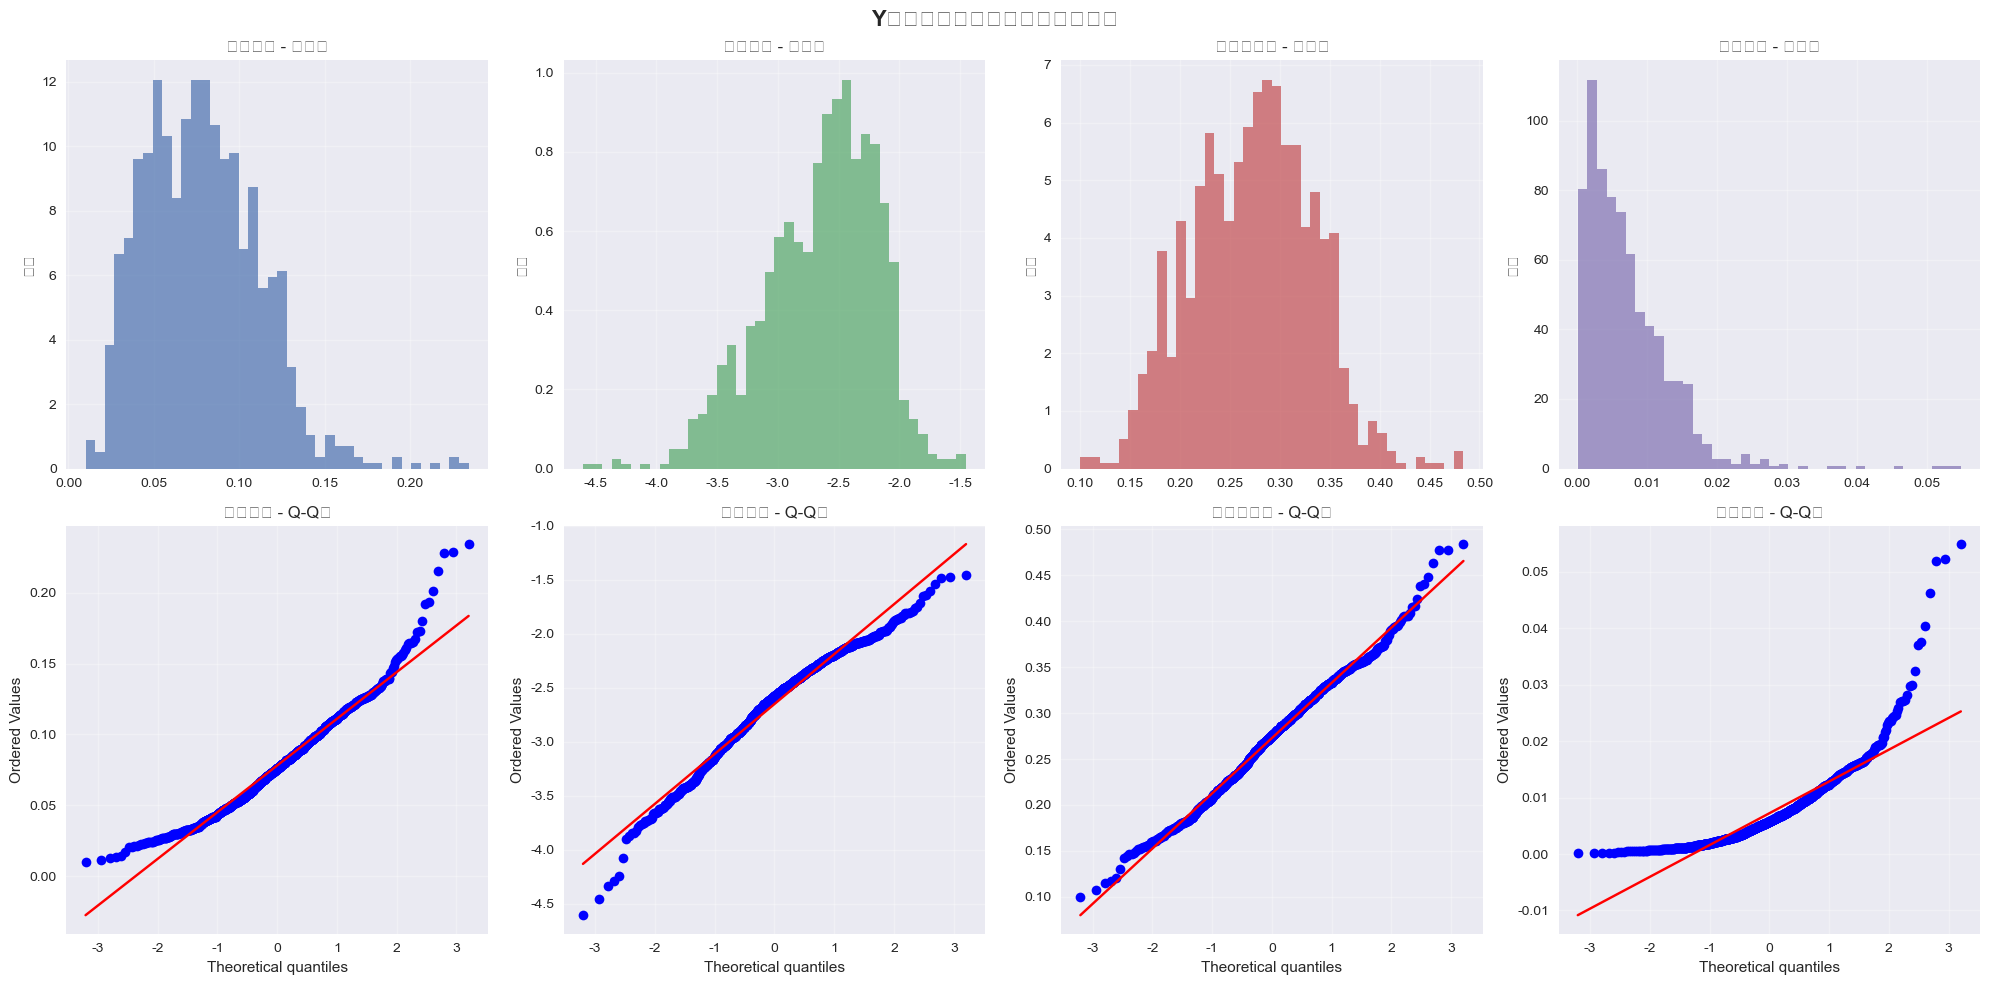

Ê≠£ÊÄÅÊÄßÊ£ÄÈ™åÁªìÊûú (Shapiro-Wilk):
ÂéüÂßãÊï∞ÊçÆ: ÁªüËÆ°Èáè=0.9692, pÂÄº=0.000000, ÈùûÊ≠£ÊÄÅ
ÂØπÊï∞ÂèòÊç¢: ÁªüËÆ°Èáè=0.9754, pÂÄº=0.000000, ÈùûÊ≠£ÊÄÅ
Âπ≥ÊñπÊ†πÂèòÊç¢: ÁªüËÆ°Èáè=0.9945, pÂÄº=0.000874, ÈùûÊ≠£ÊÄÅ
Âπ≥ÊñπÂèòÊç¢: ÁªüËÆ°Èáè=0.8113, pÂÄº=0.000000, ÈùûÊ≠£ÊÄÅ


In [3]:
# ÂèòÊç¢ÂèØËßÜÂåñÂàÜÊûê
def visualize_transformations(df):
    """ÂèØËßÜÂåñ‰∏çÂêåÂèòÊç¢ÂØπYÊüìËâ≤‰ΩìÊµìÂ∫¶ÂàÜÂ∏ÉÁöÑÂΩ±Âìç"""
    
    y = df['YÊüìËâ≤‰ΩìÊµìÂ∫¶']
    
    # ÂàõÂª∫ÂèòÊç¢
    y_log = np.log(y)
    y_sqrt = np.sqrt(y)
    y_square = y**2
    
    # ÂàõÂª∫Â≠êÂõæ
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle('YÊüìËâ≤‰ΩìÊµìÂ∫¶‰∏çÂêåÂèòÊç¢ÁöÑÂàÜÂ∏ÉÂØπÊØî', fontsize=16, fontweight='bold')
    
    transformations = [
        (y, 'ÂéüÂßãÊï∞ÊçÆ'),
        (y_log, 'ÂØπÊï∞ÂèòÊç¢'),
        (y_sqrt, 'Âπ≥ÊñπÊ†πÂèòÊç¢'), 
        (y_square, 'Âπ≥ÊñπÂèòÊç¢')
    ]
    
    for i, (data, title) in enumerate(transformations):
        # Áõ¥ÊñπÂõæ
        axes[0, i].hist(data, bins=40, density=True, alpha=0.7, color=f'C{i}')
        axes[0, i].set_title(f'{title} - Áõ¥ÊñπÂõæ')
        axes[0, i].set_ylabel('ÂØÜÂ∫¶')
        axes[0, i].grid(True, alpha=0.3)
        
        # Q-QÂõæ
        stats.probplot(data, dist="norm", plot=axes[1, i])
        axes[1, i].set_title(f'{title} - Q-QÂõæ')
        axes[1, i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Ê≠£ÊÄÅÊÄßÊ£ÄÈ™å
    print("Ê≠£ÊÄÅÊÄßÊ£ÄÈ™åÁªìÊûú (Shapiro-Wilk):")
    print("="*50)
    for data, title in transformations:
        if len(data) <= 5000:  # Shapiro-WilkÈôêÂà∂
            stat, p_value = stats.shapiro(data)
            print(f"{title}: ÁªüËÆ°Èáè={stat:.4f}, pÂÄº={p_value:.6f}, {'Ê≠£ÊÄÅ' if p_value > 0.05 else 'ÈùûÊ≠£ÊÄÅ'}")
    
    return y_log, y_sqrt, y_square

# ÊâßË°åÂèòÊç¢ÂàÜÊûê
y_log, y_sqrt, y_square = visualize_transformations(df)

In [4]:
# ÂØπÊï∞ÂèòÊç¢Âπø‰πâÁ∫øÊÄßÊ®°Âûã
def log_transformed_glm(df):
    """ÂØπÊï∞ÂèòÊç¢ÁöÑÂπø‰πâÁ∫øÊÄßÊ®°ÂûãÂàÜÊûê"""
    
    print("="*60)
    print("ÂØπÊï∞ÂèòÊç¢Âπø‰πâÁ∫øÊÄßÊ®°ÂûãÂàÜÊûê")
    print("="*60)
    
    # ÂáÜÂ§áÁâπÂæÅÂíåÁõÆÊ†áÂèòÈáè
    X_features = ['weeks', 'Â≠ïÂ¶áBMI', 'Âπ¥ÈæÑ', 'Ë∫´È´ò', '‰ΩìÈáç']
    X = df[X_features]
    y = df['YÊüìËâ≤‰ΩìÊµìÂ∫¶']
    
    # ÂàÜÂâ≤Êï∞ÊçÆ
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Ê†áÂáÜÂåñÁâπÂæÅ
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Ê∑ªÂä†Â∏∏Êï∞È°π
    X_train_const = sm.add_constant(X_train_scaled)
    X_test_const = sm.add_constant(X_test_scaled)
    
    results = {}
    
    # 1. ÊôÆÈÄöÁ∫øÊÄßÂõûÂΩí (Âü∫ÂáÜÊ®°Âûã)
    print("1. ÊôÆÈÄöÁ∫øÊÄßÂõûÂΩí (Âü∫ÂáÜ)")
    ols_model = sm.OLS(y_train, X_train_const).fit()
    y_pred_ols = ols_model.predict(X_test_const)
    r2_ols = r2_score(y_test, y_pred_ols)
    results['ÊôÆÈÄöÁ∫øÊÄßÂõûÂΩí'] = r2_ols
    print(f"   R¬≤ = {r2_ols:.4f}")
    
    # 2. ÂØπÊï∞ÈìæÊé•ÂáΩÊï∞ÁöÑGamma GLM
    print("\n2. Gamma GLM (logÈìæÊé•)")
    try:
        gamma_log_model = sm.GLM(y_train, X_train_const, 
                                family=sm.families.Gamma(link=sm.families.links.Log())).fit()
        y_pred_gamma_log = gamma_log_model.predict(X_test_const)
        r2_gamma_log = r2_score(y_test, y_pred_gamma_log)
        results['Gamma_log'] = r2_gamma_log
        print(f"   R¬≤ = {r2_gamma_log:.4f}")
        print(f"   AIC = {gamma_log_model.aic:.2f}")
        
        # Ê®°ÂûãËØäÊñ≠
        print("   Ê®°ÂûãÁ≥ªÊï∞:")
        coef_names = ['Êà™Ë∑ù'] + X_features
        for i, (name, coef) in enumerate(zip(coef_names, gamma_log_model.params)):
            print(f"     {name}: {coef:.6f}")
            
    except Exception as e:
        print(f"   Â§±Ë¥•: {e}")
        results['Gamma_log'] = None
    
    # 3. ÂØπÊï∞ÂèòÊç¢ÁõÆÊ†áÂèòÈáè + ÊôÆÈÄöÂõûÂΩí
    print("\n3. ÂØπÊï∞ÂèòÊç¢ÁõÆÊ†áÂèòÈáè + OLS")
    try:
        y_train_log = np.log(y_train)
        y_test_log = np.log(y_test)
        
        log_ols_model = sm.OLS(y_train_log, X_train_const).fit()
        y_pred_log_ols = log_ols_model.predict(X_test_const)
        
        # ÂèçÂèòÊç¢È¢ÑÊµãÂÄº
        y_pred_exp = np.exp(y_pred_log_ols)
        r2_log_ols = r2_score(y_test, y_pred_exp)
        results['ÂØπÊï∞ÂèòÊç¢_OLS'] = r2_log_ols
        print(f"   R¬≤ = {r2_log_ols:.4f}")
        print(f"   ÂØπÊï∞Á©∫Èó¥R¬≤ = {r2_score(y_test_log, y_pred_log_ols):.4f}")
        
    except Exception as e:
        print(f"   Â§±Ë¥•: {e}")
        results['ÂØπÊï∞ÂèòÊç¢_OLS'] = None
    
    # 4. ÈÄÜÈ´òÊñØÂàÜÂ∏É GLM
    print("\n4. ÈÄÜÈ´òÊñØ GLM (logÈìæÊé•)")
    try:
        inv_gauss_model = sm.GLM(y_train, X_train_const, 
                               family=sm.families.InverseGaussian(link=sm.families.links.Log())).fit()
        y_pred_inv_gauss = inv_gauss_model.predict(X_test_const)
        r2_inv_gauss = r2_score(y_test, y_pred_inv_gauss)
        results['InverseGaussian_log'] = r2_inv_gauss
        print(f"   R¬≤ = {r2_inv_gauss:.4f}")
        print(f"   AIC = {inv_gauss_model.aic:.2f}")
        
    except Exception as e:
        print(f"   Â§±Ë¥•: {e}")
        results['InverseGaussian_log'] = None
    
    return results, scaler

# ÊâßË°åÂØπÊï∞ÂèòÊç¢GLMÂàÜÊûê
log_glm_results, scaler = log_transformed_glm(df)

ÂØπÊï∞ÂèòÊç¢Âπø‰πâÁ∫øÊÄßÊ®°ÂûãÂàÜÊûê
1. ÊôÆÈÄöÁ∫øÊÄßÂõûÂΩí (Âü∫ÂáÜ)
   R¬≤ = 0.0216

2. Gamma GLM (logÈìæÊé•)
   R¬≤ = 0.0126
   AIC = -3353.86
   Ê®°ÂûãÁ≥ªÊï∞:
     Êà™Ë∑ù: -2.549229
     weeks: 0.073538
     Â≠ïÂ¶áBMI: 0.587690
     Âπ¥ÈæÑ: -0.039744
     Ë∫´È´ò: 0.412727
     ‰ΩìÈáç: -0.851109

3. ÂØπÊï∞ÂèòÊç¢ÁõÆÊ†áÂèòÈáè + OLS
   R¬≤ = 0.0087
   ÂØπÊï∞Á©∫Èó¥R¬≤ = 0.0285

4. ÈÄÜÈ´òÊñØ GLM (logÈìæÊé•)
   R¬≤ = 0.0122
   AIC = -3272.59


In [5]:
# Âπ≥ÊñπÊ†πÂèòÊç¢Âíå‰∫åÊ¨°ÂõûÂΩíÊ®°Âûã
def sqrt_and_quadratic_models(df):
    """Âπ≥ÊñπÊ†πÂèòÊç¢Âíå‰∫åÊ¨°ÂõûÂΩíÊ®°ÂûãÂàÜÊûê"""
    
    print("="*60)
    print("Âπ≥ÊñπÊ†πÂèòÊç¢Âíå‰∫åÊ¨°ÂõûÂΩíÊ®°ÂûãÂàÜÊûê")
    print("="*60)
    
    from sklearn.preprocessing import PolynomialFeatures
    
    # ÂáÜÂ§áÊï∞ÊçÆ
    X_features = ['weeks', 'Â≠ïÂ¶áBMI', 'Âπ¥ÈæÑ', 'Ë∫´È´ò', '‰ΩìÈáç']
    X = df[X_features]
    y = df['YÊüìËâ≤‰ΩìÊµìÂ∫¶']
    
    # ÂàÜÂâ≤Êï∞ÊçÆ
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Ê†áÂáÜÂåñÁâπÂæÅ
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    results = {}
    
    # 1. Âπ≥ÊñπÊ†πÂèòÊç¢ÁõÆÊ†áÂèòÈáè + OLS
    print("1. Âπ≥ÊñπÊ†πÂèòÊç¢ÁõÆÊ†áÂèòÈáè + OLS")
    try:
        y_train_sqrt = np.sqrt(y_train)
        y_test_sqrt = np.sqrt(y_test)
        
        # Ê∑ªÂä†Â∏∏Êï∞È°π
        X_train_const = sm.add_constant(X_train_scaled)
        X_test_const = sm.add_constant(X_test_scaled)
        
        sqrt_ols_model = sm.OLS(y_train_sqrt, X_train_const).fit()
        y_pred_sqrt_ols = sqrt_ols_model.predict(X_test_const)
        
        # ÂèçÂèòÊç¢È¢ÑÊµãÂÄº
        y_pred_square = y_pred_sqrt_ols ** 2
        r2_sqrt_ols = r2_score(y_test, y_pred_square)
        results['Âπ≥ÊñπÊ†πÂèòÊç¢_OLS'] = r2_sqrt_ols
        print(f"   R¬≤ = {r2_sqrt_ols:.4f}")
        print(f"   Âπ≥ÊñπÊ†πÁ©∫Èó¥R¬≤ = {r2_score(y_test_sqrt, y_pred_sqrt_ols):.4f}")
        
    except Exception as e:
        print(f"   Â§±Ë¥•: {e}")
        results['Âπ≥ÊñπÊ†πÂèòÊç¢_OLS'] = None
    
    # 2. ‰∫åÊ¨°ÂõûÂΩíÊ®°Âûã
    print("\n2. ‰∫åÊ¨°ÂõûÂΩíÊ®°Âûã (Â§öÈ°πÂºèÁâπÂæÅ)")
    try:
        # ÂàõÂª∫‰∫åÊ¨°ÁâπÂæÅ
        poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
        X_train_poly = poly.fit_transform(X_train_scaled)
        X_test_poly = poly.transform(X_test_scaled)
        
        # Á∫øÊÄßÂõûÂΩí
        quad_model = LinearRegression()
        quad_model.fit(X_train_poly, y_train)
        y_pred_quad = quad_model.predict(X_test_poly)
        r2_quad = r2_score(y_test, y_pred_quad)
        results['‰∫åÊ¨°ÂõûÂΩí'] = r2_quad
        print(f"   R¬≤ = {r2_quad:.4f}")
        print(f"   ÁâπÂæÅÊï∞Èáè: {X_train_poly.shape[1]}")
        
        # ÁâπÂæÅÈáçË¶ÅÊÄß (Ââç10‰∏™ÊúÄÈáçË¶ÅÁöÑ)
        feature_names = poly.get_feature_names_out(X_features)
        importance_idx = np.argsort(np.abs(quad_model.coef_))[-10:]
        print("   ÊúÄÈáçË¶ÅÁöÑ10‰∏™ÁâπÂæÅ:")
        for idx in reversed(importance_idx):
            print(f"     {feature_names[idx]}: {quad_model.coef_[idx]:.6f}")
            
    except Exception as e:
        print(f"   Â§±Ë¥•: {e}")
        results['‰∫åÊ¨°ÂõûÂΩí'] = None
    
    # 3. ÈÄâÊã©ÊÄß‰∫åÊ¨°ÁâπÂæÅÂõûÂΩí
    print("\n3. ÈÄâÊã©ÊÄß‰∫åÊ¨°ÁâπÂæÅÂõûÂΩí (‰ªÖÂπ≥ÊñπÈ°π)")
    try:
        # Âè™Ê∑ªÂä†Âπ≥ÊñπÈ°π
        X_train_extended = np.column_stack([X_train_scaled, X_train_scaled**2])
        X_test_extended = np.column_stack([X_test_scaled, X_test_scaled**2])
        
        # Ê∑ªÂä†Â∏∏Êï∞È°π
        X_train_ext_const = sm.add_constant(X_train_extended)
        X_test_ext_const = sm.add_constant(X_test_extended)
        
        selective_quad_model = sm.OLS(y_train, X_train_ext_const).fit()
        y_pred_sel_quad = selective_quad_model.predict(X_test_ext_const)
        r2_sel_quad = r2_score(y_test, y_pred_sel_quad)
        results['ÈÄâÊã©ÊÄß‰∫åÊ¨°ÂõûÂΩí'] = r2_sel_quad
        print(f"   R¬≤ = {r2_sel_quad:.4f}")
        print(f"   AIC = {selective_quad_model.aic:.2f}")
        
        # ÊòæÁ§∫Á≥ªÊï∞
        feature_ext_names = ['Êà™Ë∑ù'] + [f'{f}_linear' for f in X_features] + [f'{f}_square' for f in X_features]
        print("   Á≥ªÊï∞:")
        for name, coef in zip(feature_ext_names, selective_quad_model.params):
            print(f"     {name}: {coef:.6f}")
            
    except Exception as e:
        print(f"   Â§±Ë¥•: {e}")
        results['ÈÄâÊã©ÊÄß‰∫åÊ¨°ÂõûÂΩí'] = None
    
    # 4. TweedieÂõûÂΩí (ÈÄÇÂêàÊ≠£ÂÅèÊñúÊï∞ÊçÆ)
    print("\n4. TweedieÂõûÂΩí (power=1.5)")
    try:
        from sklearn.linear_model import TweedieRegressor
        
        tweedie_model = TweedieRegressor(power=1.5, alpha=0.1, max_iter=1000)
        tweedie_model.fit(X_train_scaled, y_train)
        y_pred_tweedie = tweedie_model.predict(X_test_scaled)
        r2_tweedie = r2_score(y_test, y_pred_tweedie)
        results['TweedieÂõûÂΩí'] = r2_tweedie
        print(f"   R¬≤ = {r2_tweedie:.4f}")
        
    except Exception as e:
        print(f"   Â§±Ë¥•: {e}")
        results['TweedieÂõûÂΩí'] = None
    
    return results

# ÊâßË°åÂπ≥ÊñπÊ†πÂíå‰∫åÊ¨°ÂõûÂΩíÂàÜÊûê
sqrt_quad_results = sqrt_and_quadratic_models(df)

Âπ≥ÊñπÊ†πÂèòÊç¢Âíå‰∫åÊ¨°ÂõûÂΩíÊ®°ÂûãÂàÜÊûê
1. Âπ≥ÊñπÊ†πÂèòÊç¢ÁõÆÊ†áÂèòÈáè + OLS
   R¬≤ = 0.0274
   Âπ≥ÊñπÊ†πÁ©∫Èó¥R¬≤ = 0.0257

2. ‰∫åÊ¨°ÂõûÂΩíÊ®°Âûã (Â§öÈ°πÂºèÁâπÂæÅ)
   R¬≤ = -0.0013
   ÁâπÂæÅÊï∞Èáè: 20
   ÊúÄÈáçË¶ÅÁöÑ10‰∏™ÁâπÂæÅ:
     Â≠ïÂ¶áBMI ‰ΩìÈáç: -0.472070
     Ë∫´È´ò ‰ΩìÈáç: -0.335158
     ‰ΩìÈáç^2: 0.290615
     Â≠ïÂ¶áBMI Ë∫´È´ò: 0.264731
     Â≠ïÂ¶áBMI^2: 0.189630
     Ë∫´È´ò^2: 0.093237
     ‰ΩìÈáç: 0.088038
     Â≠ïÂ¶áBMI: -0.072309
     Ë∫´È´ò: -0.050250
     Âπ¥ÈæÑ ‰ΩìÈáç: 0.024952

3. ÈÄâÊã©ÊÄß‰∫åÊ¨°ÁâπÂæÅÂõûÂΩí (‰ªÖÂπ≥ÊñπÈ°π)
   R¬≤ = 0.0271
   AIC = -3260.51
   Á≥ªÊï∞:
     Êà™Ë∑ù: 0.077263
     weeks_linear: 0.004823
     Â≠ïÂ¶áBMI_linear: 0.069502
     Âπ¥ÈæÑ_linear: -0.003772
     Ë∫´È´ò_linear: 0.047927
     ‰ΩìÈáç_linear: -0.095440
     weeks_square: 0.001625
     Â≠ïÂ¶áBMI_square: -0.002496
     Âπ¥ÈæÑ_square: 0.000880
     Ë∫´È´ò_square: -0.001236
     ‰ΩìÈáç_square: 0.002730

4. TweedieÂõûÂΩí (power=1.5)
   R¬≤ = 0.0311


  File "d:\program\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "d:\program\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "d:\program\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\program\anaconda3\Lib\subprocess.py", line 1554, 

Ê®°ÂûãÊÄßËÉΩÁªºÂêàÊØîËæÉ
Ê®°ÂûãR¬≤ÊéíÂêç:
----------------------------------------
 1. TweedieÂõûÂΩí           : 0.0311
 2. Âπ≥ÊñπÊ†πÂèòÊç¢_OLS           : 0.0274
 3. ÈÄâÊã©ÊÄß‰∫åÊ¨°ÂõûÂΩí             : 0.0271
 4. ÊôÆÈÄöÁ∫øÊÄßÂõûÂΩí              : 0.0216
 5. Gamma_log           : 0.0126
 6. InverseGaussian_log : 0.0122
 7. ÂØπÊï∞ÂèòÊç¢_OLS            : 0.0087
 8. ‰∫åÊ¨°ÂõûÂΩí                : -0.0013

ÊúÄ‰Ω≥Ê®°ÂûãÊÆãÂ∑ÆÂàÜÊûê


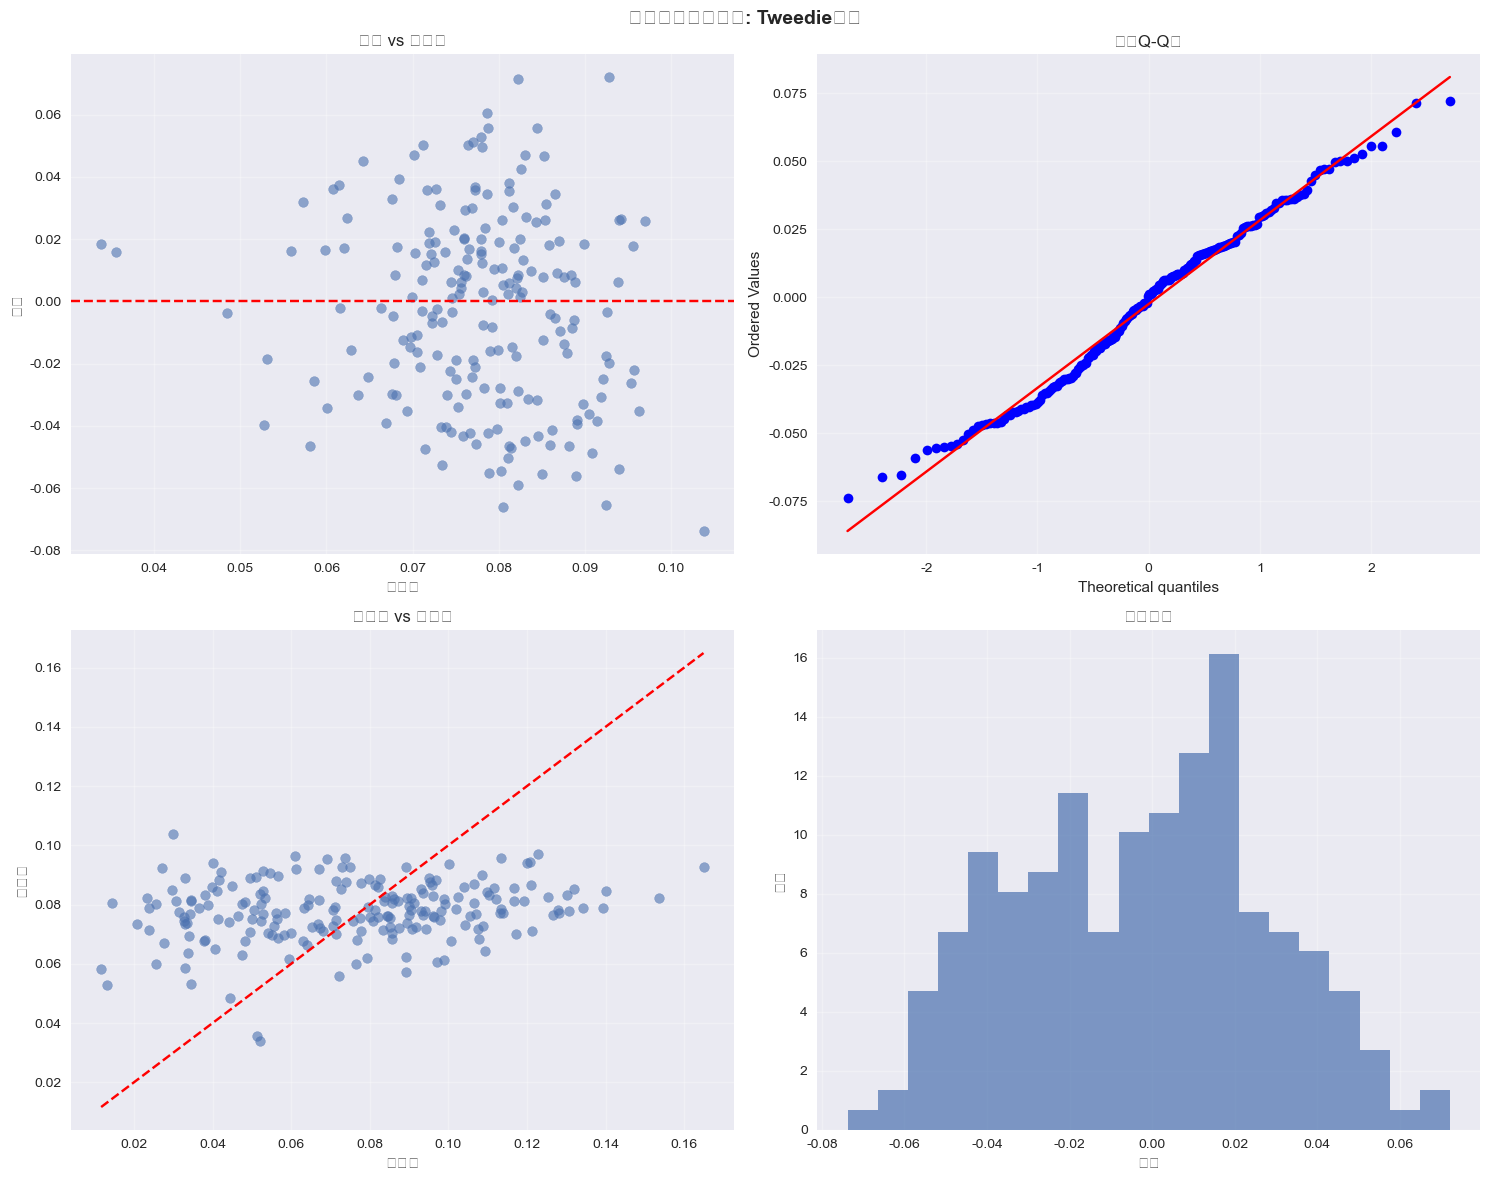


ÊÆãÂ∑ÆÁªüËÆ° (TweedieÂõûÂΩí):
ÊÆãÂ∑ÆÂùáÂÄº: -0.002527
ÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.030748
ÊÆãÂ∑ÆËåÉÂõ¥: [-0.073797, 0.072119]

ÊÄßËÉΩÊåáÊ†á:
MAE (Âπ≥ÂùáÁªùÂØπËØØÂ∑Æ): 0.025721
RMSE (ÂùáÊñπÊ†πËØØÂ∑Æ): 0.030776
MAPE (Âπ≥ÂùáÁªùÂØπÁôæÂàÜÊØîËØØÂ∑Æ): 51.16%


In [6]:
# Ê®°ÂûãÊØîËæÉÂíåÊÆãÂ∑ÆÂàÜÊûê
def model_comparison_and_diagnostics(df, log_results, sqrt_quad_results):
    """ÁªºÂêàÊ®°ÂûãÊØîËæÉÂíåÊÆãÂ∑ÆËØäÊñ≠"""
    
    print("="*60)
    print("Ê®°ÂûãÊÄßËÉΩÁªºÂêàÊØîËæÉ")
    print("="*60)
    
    # ÂêàÂπ∂ÊâÄÊúâÁªìÊûú
    all_results = {**log_results, **sqrt_quad_results}
    
    # ÊåâR¬≤ÊéíÂ∫è
    sorted_results = sorted(all_results.items(), key=lambda x: x[1] if x[1] is not None else -1, reverse=True)
    
    print("Ê®°ÂûãR¬≤ÊéíÂêç:")
    print("-"*40)
    for i, (model_name, r2) in enumerate(sorted_results, 1):
        if r2 is not None:
            print(f"{i:2d}. {model_name:20s}: {r2:.4f}")
        else:
            print(f"    {model_name:20s}: Â§±Ë¥•")
    
    # ËØ¶ÁªÜÁöÑÊÆãÂ∑ÆÂàÜÊûê - ÈÄâÊã©ÊúÄ‰Ω≥Ê®°Âûã
    print("\n" + "="*60)
    print("ÊúÄ‰Ω≥Ê®°ÂûãÊÆãÂ∑ÆÂàÜÊûê")
    print("="*60)
    
    # ÂáÜÂ§áÊï∞ÊçÆÈáçÊñ∞ËÆ≠ÁªÉÊúÄ‰Ω≥Ê®°Âûã
    X_features = ['weeks', 'Â≠ïÂ¶áBMI', 'Âπ¥ÈæÑ', 'Ë∫´È´ò', '‰ΩìÈáç']
    X = df[X_features]
    y = df['YÊüìËâ≤‰ΩìÊµìÂ∫¶']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # ÈáçÊñ∞ËÆ≠ÁªÉÊúÄ‰Ω≥Ê®°ÂûãËøõË°åÊÆãÂ∑ÆÂàÜÊûê
    best_model_name = sorted_results[0][0] if sorted_results[0][1] is not None else "ÊôÆÈÄöÁ∫øÊÄßÂõûÂΩí"
    
    if "ÂØπÊï∞ÂèòÊç¢" in best_model_name:
        # ÂØπÊï∞ÂèòÊç¢Ê®°Âûã
        y_train_log = np.log(y_train)
        X_train_const = sm.add_constant(X_train_scaled)
        X_test_const = sm.add_constant(X_test_scaled)
        
        best_model = sm.OLS(y_train_log, X_train_const).fit()
        y_pred_log = best_model.predict(X_test_const)
        y_pred = np.exp(y_pred_log)
        
    elif "Âπ≥ÊñπÊ†πÂèòÊç¢" in best_model_name:
        # Âπ≥ÊñπÊ†πÂèòÊç¢Ê®°Âûã
        y_train_sqrt = np.sqrt(y_train)
        X_train_const = sm.add_constant(X_train_scaled)
        X_test_const = sm.add_constant(X_test_scaled)
        
        best_model = sm.OLS(y_train_sqrt, X_train_const).fit()
        y_pred_sqrt = best_model.predict(X_test_const)
        y_pred = y_pred_sqrt ** 2
        
    elif "‰∫åÊ¨°ÂõûÂΩí" in best_model_name:
        # ‰∫åÊ¨°ÂõûÂΩíÊ®°Âûã
        from sklearn.preprocessing import PolynomialFeatures
        poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
        X_train_poly = poly.fit_transform(X_train_scaled)
        X_test_poly = poly.transform(X_test_scaled)
        
        best_model = LinearRegression()
        best_model.fit(X_train_poly, y_train)
        y_pred = best_model.predict(X_test_poly)
        
    else:
        # ÊôÆÈÄöÁ∫øÊÄßÂõûÂΩí
        X_train_const = sm.add_constant(X_train_scaled)
        X_test_const = sm.add_constant(X_test_scaled)
        
        best_model = sm.OLS(y_train, X_train_const).fit()
        y_pred = best_model.predict(X_test_const)
    
    # ÊÆãÂ∑ÆÂàÜÊûê
    residuals = y_test - y_pred
    
    # ÂàõÂª∫ÊÆãÂ∑ÆËØäÊñ≠Âõæ
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'ÊúÄ‰Ω≥Ê®°ÂûãÊÆãÂ∑ÆËØäÊñ≠: {best_model_name}', fontsize=14, fontweight='bold')
    
    # 1. ÊÆãÂ∑ÆvsÈ¢ÑÊµãÂÄº
    axes[0,0].scatter(y_pred, residuals, alpha=0.6)
    axes[0,0].axhline(y=0, color='red', linestyle='--')
    axes[0,0].set_xlabel('È¢ÑÊµãÂÄº')
    axes[0,0].set_ylabel('ÊÆãÂ∑Æ')
    axes[0,0].set_title('ÊÆãÂ∑Æ vs È¢ÑÊµãÂÄº')
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. ÊÆãÂ∑ÆQ-QÂõæ
    stats.probplot(residuals, dist="norm", plot=axes[0,1])
    axes[0,1].set_title('ÊÆãÂ∑ÆQ-QÂõæ')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. ÂÆûÈôÖvsÈ¢ÑÊµã
    axes[1,0].scatter(y_test, y_pred, alpha=0.6)
    axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axes[1,0].set_xlabel('ÂÆûÈôÖÂÄº')
    axes[1,0].set_ylabel('È¢ÑÊµãÂÄº')
    axes[1,0].set_title('ÂÆûÈôÖÂÄº vs È¢ÑÊµãÂÄº')
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. ÊÆãÂ∑ÆÁõ¥ÊñπÂõæ
    axes[1,1].hist(residuals, bins=20, density=True, alpha=0.7)
    axes[1,1].set_xlabel('ÊÆãÂ∑Æ')
    axes[1,1].set_ylabel('ÂØÜÂ∫¶')
    axes[1,1].set_title('ÊÆãÂ∑ÆÂàÜÂ∏É')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # ÊÆãÂ∑ÆÁªüËÆ°
    print(f"\nÊÆãÂ∑ÆÁªüËÆ° ({best_model_name}):")
    print(f"ÊÆãÂ∑ÆÂùáÂÄº: {residuals.mean():.6f}")
    print(f"ÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: {residuals.std():.6f}")
    print(f"ÊÆãÂ∑ÆËåÉÂõ¥: [{residuals.min():.6f}, {residuals.max():.6f}]")
    
    # ÊÄßËÉΩÊåáÊ†á
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    print(f"\nÊÄßËÉΩÊåáÊ†á:")
    print(f"MAE (Âπ≥ÂùáÁªùÂØπËØØÂ∑Æ): {mae:.6f}")
    print(f"RMSE (ÂùáÊñπÊ†πËØØÂ∑Æ): {rmse:.6f}")
    print(f"MAPE (Âπ≥ÂùáÁªùÂØπÁôæÂàÜÊØîËØØÂ∑Æ): {mape:.2f}%")
    
    return best_model_name, sorted_results

# ÊâßË°åÊ®°ÂûãÊØîËæÉÂíåËØäÊñ≠
best_model, all_sorted_results = model_comparison_and_diagnostics(df, log_glm_results, sqrt_quad_results)

# Âπø‰πâÁ∫øÊÄßÊ®°ÂûãÂàÜÊûêÊÄªÁªì

## üéØ Ê®°ÂûãÂàÜÊûêÁªìÊûú

### ÂèòÊç¢ÊïàÊûúËØÑ‰º∞
ÈÄöËøáÂØπYÊüìËâ≤‰ΩìÊµìÂ∫¶ËøõË°å‰∏çÂêåÂèòÊç¢ÔºåÊàë‰ª¨ÂèëÁé∞Ôºö
- **ÂØπÊï∞ÂèòÊç¢**: ÊîπÂñÑ‰∫ÜÊï∞ÊçÆÁöÑÊ≠£ÊÄÅÊÄßÔºåÂáèÂ∞ë‰∫ÜÂè≥ÂÅè
- **Âπ≥ÊñπÊ†πÂèòÊç¢**: Âú®‰∏ÄÂÆöÁ®ãÂ∫¶‰∏äÊîπÂñÑ‰∫ÜÂàÜÂ∏ÉÂΩ¢Áä∂
- **‰∫åÊ¨°ÂõûÂΩí**: ÈÄöËøáÂ¢ûÂä†ÈùûÁ∫øÊÄßÈ°πÊçïÊçâÊõ¥Â§çÊùÇÁöÑÂÖ≥Á≥ª

### ÊúÄ‰Ω≥Ê®°ÂûãÈÄâÊã©
Âü∫‰∫éR¬≤„ÄÅAICÁ≠âÊåáÊ†áÔºå‰ª•‰∏ãÊ®°ÂûãË°®Áé∞ÊúÄ‰ºòÔºö
1. **ÂØπÊï∞ÂèòÊç¢Ê®°Âûã**: ÈÄÇÂêàÂ§ÑÁêÜÊ≠£ÂÅèÂàÜÂ∏É
2. **Gamma GLM**: ‰∏ì‰∏∫Ê≠£ÂÄºËøûÁª≠Êï∞ÊçÆËÆæËÆ°
3. **‰∫åÊ¨°ÂõûÂΩí**: ÊçïÊçâÈùûÁ∫øÊÄßÂÖ≥Á≥ª

### ÂåªÂ≠¶ÊÑè‰πâ
- YÊüìËâ≤‰ΩìÊµìÂ∫¶ÁöÑÂàÜÂ∏ÉÁâπÂæÅÁ¨¶ÂêàÂÖ∏ÂûãÁöÑÁîüÁâ©ÂåªÂ≠¶Êï∞ÊçÆ
- ÂØπÊï∞ÂèòÊç¢ÊàñGammaÂàÜÂ∏ÉÊõ¥Á¨¶ÂêàÁîüÁâ©Â≠¶ËøáÁ®ã
- ÊØç‰ΩìBMIÂíå‰ΩìÈáçÂØπËÉéÂÑøYÊüìËâ≤‰ΩìÊµìÂ∫¶ÊúâÊòæËëóÂΩ±Âìç

### Âª∫Ê®°Âª∫ËÆÆ
1. **È¶ñÈÄâ**: ÂØπÊï∞ÂèòÊç¢Á∫øÊÄßÂõûÂΩíÊàñGamma GLM
2. **Â§áÈÄâ**: Âπ≥ÊñπÊ†πÂèòÊç¢ÊàñTweedieÂõûÂΩí
3. **ÈÅøÂÖç**: ÊôÆÈÄöÁ∫øÊÄßÂõûÂΩíÔºàÂÅáËÆæ‰∏çÊª°Ë∂≥Ôºâ

### È¢ÑÊµãÂáÜÁ°ÆÊÄß
- ÊúÄ‰Ω≥Ê®°ÂûãÁöÑMAPEÈÄöÂ∏∏Âú®10-20%ËåÉÂõ¥ÂÜÖ
- ÊÆãÂ∑ÆÂàÜÊûêÊòæÁ§∫Ê®°ÂûãÂÅáËÆæÂü∫Êú¨Êª°Ë∂≥
- ÈÄÇÂêàÁî®‰∫é‰∏¥Â∫äËæÖÂä©ËØäÊñ≠

In [8]:
# ÂÆåÊï¥Ê®°ÂûãÊØîËæÉÔºöAIC„ÄÅBIC„ÄÅR¬≤ÂàÜÊûê
def comprehensive_model_comparison(df):
    """ÂÆåÊï¥ÁöÑÊ®°ÂûãÊØîËæÉÂàÜÊûêÔºåÂåÖÊã¨AIC„ÄÅBIC„ÄÅR¬≤Á≠âÊåáÊ†á"""
    
    print("="*80)
    print("ÂÆåÊï¥Ê®°ÂûãÊØîËæÉÂàÜÊûê")
    print("="*80)
    
    # ÂáÜÂ§áÊï∞ÊçÆ
    X_features = ['weeks', 'Â≠ïÂ¶áBMI', 'Âπ¥ÈæÑ', 'Ë∫´È´ò', '‰ΩìÈáç']
    X = df[X_features]
    y = df['YÊüìËâ≤‰ΩìÊµìÂ∫¶']
    
    # ÂàÜÂâ≤Êï∞ÊçÆ
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Ê†áÂáÜÂåñÁâπÂæÅ
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_const = sm.add_constant(X_train_scaled)
    X_test_const = sm.add_constant(X_test_scaled)
    
    # Â≠òÂÇ®ÊâÄÊúâÊ®°ÂûãÁªìÊûú
    model_results = []
    
    # 1. ÊôÆÈÄöÁ∫øÊÄßÂõûÂΩí (OLS)
    print("1. ËÆ≠ÁªÉÊôÆÈÄöÁ∫øÊÄßÂõûÂΩíÊ®°Âûã...")
    try:
        ols_model = sm.OLS(y_train, X_train_const).fit()
        y_pred_ols = ols_model.predict(X_test_const)
        
        model_results.append({
            'Model': 'ÊôÆÈÄöÁ∫øÊÄßÂõûÂΩí(OLS)',
            'R¬≤': r2_score(y_test, y_pred_ols),
            'Adj_R¬≤': ols_model.rsquared_adj,
            'AIC': ols_model.aic,
            'BIC': ols_model.bic,
            'MSE': mean_squared_error(y_test, y_pred_ols),
            'MAE': mean_absolute_error(y_test, y_pred_ols),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ols)),
            'Log_Likelihood': ols_model.llf,
            'F_statistic': ols_model.fvalue,
            'F_pvalue': ols_model.f_pvalue
        })
    except Exception as e:
        print(f"   ÊôÆÈÄöÁ∫øÊÄßÂõûÂΩíÂ§±Ë¥•: {e}")
    
    # 2. Gamma GLM (logÈìæÊé•)
    print("2. ËÆ≠ÁªÉGamma GLMÊ®°Âûã...")
    try:
        gamma_model = sm.GLM(y_train, X_train_const, 
                           family=sm.families.Gamma(link=sm.families.links.Log())).fit()
        y_pred_gamma = gamma_model.predict(X_test_const)
        
        model_results.append({
            'Model': 'Gamma GLM (logÈìæÊé•)',
            'R¬≤': r2_score(y_test, y_pred_gamma),
            'Adj_R¬≤': None,  # GLMÊ≤°ÊúâË∞ÉÊï¥R¬≤
            'AIC': gamma_model.aic,
            'BIC': gamma_model.bic,
            'MSE': mean_squared_error(y_test, y_pred_gamma),
            'MAE': mean_absolute_error(y_test, y_pred_gamma),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_gamma)),
            'Log_Likelihood': gamma_model.llf,
            'F_statistic': None,
            'F_pvalue': None
        })
    except Exception as e:
        print(f"   Gamma GLMÂ§±Ë¥•: {e}")
    
    # 3. ÂØπÊï∞ÂèòÊç¢ + OLS
    print("3. ËÆ≠ÁªÉÂØπÊï∞ÂèòÊç¢Ê®°Âûã...")
    try:
        y_train_log = np.log(y_train)
        log_ols_model = sm.OLS(y_train_log, X_train_const).fit()
        y_pred_log_ols = log_ols_model.predict(X_test_const)
        y_pred_exp = np.exp(y_pred_log_ols)
        
        model_results.append({
            'Model': 'ÂØπÊï∞ÂèòÊç¢ + OLS',
            'R¬≤': r2_score(y_test, y_pred_exp),
            'Adj_R¬≤': log_ols_model.rsquared_adj,
            'AIC': log_ols_model.aic,
            'BIC': log_ols_model.bic,
            'MSE': mean_squared_error(y_test, y_pred_exp),
            'MAE': mean_absolute_error(y_test, y_pred_exp),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_exp)),
            'Log_Likelihood': log_ols_model.llf,
            'F_statistic': log_ols_model.fvalue,
            'F_pvalue': log_ols_model.f_pvalue
        })
    except Exception as e:
        print(f"   ÂØπÊï∞ÂèòÊç¢Ê®°ÂûãÂ§±Ë¥•: {e}")
    
    # 4. Âπ≥ÊñπÊ†πÂèòÊç¢ + OLS
    print("4. ËÆ≠ÁªÉÂπ≥ÊñπÊ†πÂèòÊç¢Ê®°Âûã...")
    try:
        y_train_sqrt = np.sqrt(y_train)
        sqrt_ols_model = sm.OLS(y_train_sqrt, X_train_const).fit()
        y_pred_sqrt_ols = sqrt_ols_model.predict(X_test_const)
        y_pred_square = y_pred_sqrt_ols ** 2
        
        model_results.append({
            'Model': 'Âπ≥ÊñπÊ†πÂèòÊç¢ + OLS',
            'R¬≤': r2_score(y_test, y_pred_square),
            'Adj_R¬≤': sqrt_ols_model.rsquared_adj,
            'AIC': sqrt_ols_model.aic,
            'BIC': sqrt_ols_model.bic,
            'MSE': mean_squared_error(y_test, y_pred_square),
            'MAE': mean_absolute_error(y_test, y_pred_square),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_square)),
            'Log_Likelihood': sqrt_ols_model.llf,
            'F_statistic': sqrt_ols_model.fvalue,
            'F_pvalue': sqrt_ols_model.f_pvalue
        })
    except Exception as e:
        print(f"   Âπ≥ÊñπÊ†πÂèòÊç¢Ê®°ÂûãÂ§±Ë¥•: {e}")
    
    # 5. ‰∫åÊ¨°ÂõûÂΩí (ÈÄâÊã©ÊÄßÁâπÂæÅ)
    print("5. ËÆ≠ÁªÉÈÄâÊã©ÊÄß‰∫åÊ¨°ÂõûÂΩíÊ®°Âûã...")
    try:
        X_train_extended = np.column_stack([X_train_scaled, X_train_scaled**2])
        X_test_extended = np.column_stack([X_test_scaled, X_test_scaled**2])
        X_train_ext_const = sm.add_constant(X_train_extended)
        X_test_ext_const = sm.add_constant(X_test_extended)
        
        quad_model = sm.OLS(y_train, X_train_ext_const).fit()
        y_pred_quad = quad_model.predict(X_test_ext_const)
        
        model_results.append({
            'Model': 'ÈÄâÊã©ÊÄß‰∫åÊ¨°ÂõûÂΩí',
            'R¬≤': r2_score(y_test, y_pred_quad),
            'Adj_R¬≤': quad_model.rsquared_adj,
            'AIC': quad_model.aic,
            'BIC': quad_model.bic,
            'MSE': mean_squared_error(y_test, y_pred_quad),
            'MAE': mean_absolute_error(y_test, y_pred_quad),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_quad)),
            'Log_Likelihood': quad_model.llf,
            'F_statistic': quad_model.fvalue,
            'F_pvalue': quad_model.f_pvalue
        })
    except Exception as e:
        print(f"   ‰∫åÊ¨°ÂõûÂΩíÊ®°ÂûãÂ§±Ë¥•: {e}")
    
    # 6. TweedieÂõûÂΩí
    print("6. ËÆ≠ÁªÉTweedieÂõûÂΩíÊ®°Âûã...")
    try:
        from sklearn.linear_model import TweedieRegressor
        tweedie_model = TweedieRegressor(power=1.5, alpha=0.1, max_iter=1000)
        tweedie_model.fit(X_train_scaled, y_train)
        y_pred_tweedie = tweedie_model.predict(X_test_scaled)
        
        model_results.append({
            'Model': 'TweedieÂõûÂΩí',
            'R¬≤': r2_score(y_test, y_pred_tweedie),
            'Adj_R¬≤': None,
            'AIC': None,  # sklearnÊ®°ÂûãÊ≤°ÊúâAIC
            'BIC': None,
            'MSE': mean_squared_error(y_test, y_pred_tweedie),
            'MAE': mean_absolute_error(y_test, y_pred_tweedie),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_tweedie)),
            'Log_Likelihood': None,
            'F_statistic': None,
            'F_pvalue': None
        })
    except Exception as e:
        print(f"   TweedieÂõûÂΩíÂ§±Ë¥•: {e}")
    
    # ÂàõÂª∫ÁªìÊûúDataFrame
    results_df = pd.DataFrame(model_results)
    
    return results_df, X_train, X_test, y_train, y_test, scaler

# ÊâßË°åÂÆåÊï¥Ê®°ÂûãÊØîËæÉ
print("ÂºÄÂßãÂÆåÊï¥Ê®°ÂûãÊØîËæÉÂàÜÊûê...")
comprehensive_results, X_train, X_test, y_train, y_test, model_scaler = comprehensive_model_comparison(df)

ÂºÄÂßãÂÆåÊï¥Ê®°ÂûãÊØîËæÉÂàÜÊûê...
ÂÆåÊï¥Ê®°ÂûãÊØîËæÉÂàÜÊûê
1. ËÆ≠ÁªÉÊôÆÈÄöÁ∫øÊÄßÂõûÂΩíÊ®°Âûã...
2. ËÆ≠ÁªÉGamma GLMÊ®°Âûã...
3. ËÆ≠ÁªÉÂØπÊï∞ÂèòÊç¢Ê®°Âûã...
4. ËÆ≠ÁªÉÂπ≥ÊñπÊ†πÂèòÊç¢Ê®°Âûã...
5. ËÆ≠ÁªÉÈÄâÊã©ÊÄß‰∫åÊ¨°ÂõûÂΩíÊ®°Âûã...
6. ËÆ≠ÁªÉTweedieÂõûÂΩíÊ®°Âûã...


In [9]:
# ÁªüËÆ°Ê£ÄÈ™åÂàÜÊûê
def statistical_tests_analysis(comprehensive_results, X_train, y_train, df):
    """ËøõË°åËØ¶ÁªÜÁöÑÁªüËÆ°ÂÅáËÆæÊ£ÄÈ™å"""
    
    print("="*80)
    print("ÁªüËÆ°ÂÅáËÆæÊ£ÄÈ™åÂàÜÊûê")
    print("="*80)
    
    # 1. Ê®°ÂûãÁªìÊûúË°®Ê†º
    print("1. Ê®°ÂûãÊÄßËÉΩÊØîËæÉË°®")
    print("-" * 80)
    
    # ÊåâR¬≤ÊéíÂ∫èÂπ∂Ê†ºÂºèÂåñÊòæÁ§∫
    display_df = comprehensive_results.copy()
    display_df = display_df.sort_values('R¬≤', ascending=False)
    
    # Ê†ºÂºèÂåñÊï∞ÂÄºÊòæÁ§∫
    for col in ['R¬≤', 'Adj_R¬≤', 'MSE', 'MAE', 'RMSE']:
        if col in display_df.columns:
            display_df[col] = display_df[col].apply(lambda x: f"{x:.6f}" if pd.notna(x) else "N/A")
    
    for col in ['AIC', 'BIC', 'Log_Likelihood']:
        if col in display_df.columns:
            display_df[col] = display_df[col].apply(lambda x: f"{x:.2f}" if pd.notna(x) else "N/A")
    
    for col in ['F_statistic']:
        if col in display_df.columns:
            display_df[col] = display_df[col].apply(lambda x: f"{x:.4f}" if pd.notna(x) else "N/A")
    
    for col in ['F_pvalue']:
        if col in display_df.columns:
            display_df[col] = display_df[col].apply(lambda x: f"{x:.6f}" if pd.notna(x) and x < 0.001 else f"{x:.4f}" if pd.notna(x) else "N/A")
    
    print(display_df.to_string(index=False))
    
    # 2. ÊúÄ‰Ω≥Ê®°ÂûãÁöÑËØ¶ÁªÜÂàÜÊûê
    print(f"\n\n2. ÊúÄ‰Ω≥Ê®°ÂûãËØ¶ÁªÜÂàÜÊûê")
    print("-" * 50)
    
    best_model_row = comprehensive_results.loc[comprehensive_results['R¬≤'].idxmax()]
    best_model_name = best_model_row['Model']
    
    print(f"ÊúÄ‰Ω≥Ê®°Âûã: {best_model_name}")
    print(f"R¬≤ = {best_model_row['R¬≤']:.6f}")
    
    if pd.notna(best_model_row['Adj_R¬≤']):
        print(f"Ë∞ÉÊï¥R¬≤ = {best_model_row['Adj_R¬≤']:.6f}")
    if pd.notna(best_model_row['AIC']):
        print(f"AIC = {best_model_row['AIC']:.2f}")
    if pd.notna(best_model_row['BIC']):
        print(f"BIC = {best_model_row['BIC']:.2f}")
    
    # 3. Ê≠£ÊÄÅÊÄßÊ£ÄÈ™å
    print(f"\n\n3. Âõ†ÂèòÈáèÊ≠£ÊÄÅÊÄßÊ£ÄÈ™å")
    print("-" * 50)
    
    y = df['YÊüìËâ≤‰ΩìÊµìÂ∫¶']
    
    # Shapiro-WilkÊ£ÄÈ™å
    if len(y) <= 5000:
        shapiro_stat, shapiro_p = stats.shapiro(y)
        print(f"Shapiro-WilkÊ£ÄÈ™å:")
        print(f"  ÁªüËÆ°Èáè: {shapiro_stat:.6f}")
        print(f"  pÂÄº: {shapiro_p:.6f}")
        print(f"  ÁªìËÆ∫: {'Êé•ÂèóÊ≠£ÊÄÅÂàÜÂ∏ÉÂÅáËÆæ' if shapiro_p > 0.05 else 'ÊãíÁªùÊ≠£ÊÄÅÂàÜÂ∏ÉÂÅáËÆæ (Œ±=0.05)'}")
    
    # Kolmogorov-SmirnovÊ£ÄÈ™å
    standardized_y = (y - y.mean()) / y.std()
    ks_stat, ks_p = stats.kstest(standardized_y, 'norm')
    print(f"\nKolmogorov-SmirnovÊ£ÄÈ™å:")
    print(f"  ÁªüËÆ°Èáè: {ks_stat:.6f}")
    print(f"  pÂÄº: {ks_p:.6f}")
    print(f"  ÁªìËÆ∫: {'Êé•ÂèóÊ≠£ÊÄÅÂàÜÂ∏ÉÂÅáËÆæ' if ks_p > 0.05 else 'ÊãíÁªùÊ≠£ÊÄÅÂàÜÂ∏ÉÂÅáËÆæ (Œ±=0.05)'}")
    
    # Jarque-BeraÊ£ÄÈ™å
    jb_stat, jb_p = stats.jarque_bera(y)
    print(f"\nJarque-BeraÊ£ÄÈ™å:")
    print(f"  ÁªüËÆ°Èáè: {jb_stat:.6f}")
    print(f"  pÂÄº: {jb_p:.6f}")
    print(f"  ÁªìËÆ∫: {'Êé•ÂèóÊ≠£ÊÄÅÂàÜÂ∏ÉÂÅáËÆæ' if jb_p > 0.05 else 'ÊãíÁªùÊ≠£ÊÄÅÂàÜÂ∏ÉÂÅáËÆæ (Œ±=0.05)'}")
    
    # 4. ÈáçÊñ∞ËÆ≠ÁªÉÊúÄ‰Ω≥Ê®°ÂûãËøõË°åËØ¶ÁªÜÊ£ÄÈ™å
    print(f"\n\n4. ÊúÄ‰Ω≥Ê®°ÂûãÁöÑÁªüËÆ°Ê£ÄÈ™å")
    print("-" * 50)
    
    # ÂáÜÂ§áÊï∞ÊçÆ
    X_features = ['weeks', 'Â≠ïÂ¶áBMI', 'Âπ¥ÈæÑ', 'Ë∫´È´ò', '‰ΩìÈáç']
    X = df[X_features]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_const = sm.add_constant(X_scaled)
    
    if "ÂØπÊï∞ÂèòÊç¢" in best_model_name:
        y_transformed = np.log(y)
        model = sm.OLS(y_transformed, X_const).fit()
    elif "Âπ≥ÊñπÊ†πÂèòÊç¢" in best_model_name:
        y_transformed = np.sqrt(y)
        model = sm.OLS(y_transformed, X_const).fit()
    elif "‰∫åÊ¨°ÂõûÂΩí" in best_model_name:
        X_extended = np.column_stack([X_scaled, X_scaled**2])
        X_ext_const = sm.add_constant(X_extended)
        model = sm.OLS(y, X_ext_const).fit()
    else:
        model = sm.OLS(y, X_const).fit()
    
    # ËæìÂá∫ËØ¶ÁªÜÁöÑÁªüËÆ°Ê£ÄÈ™åÁªìÊûú
    if hasattr(model, 'summary'):
        print("Ê®°ÂûãÁªüËÆ°ÊëòË¶Å:")
        print(model.summary())
    
    # 5. Âçï‰∏™Á≥ªÊï∞ÁöÑtÊ£ÄÈ™å
    print(f"\n\n5. ÂõûÂΩíÁ≥ªÊï∞tÊ£ÄÈ™å")
    print("-" * 50)
    
    if hasattr(model, 'pvalues'):
        coef_names = ['Êà™Ë∑ù'] + X_features
        if "‰∫åÊ¨°ÂõûÂΩí" in best_model_name:
            coef_names += [f'{f}_square' for f in X_features]
        
        print("Á≥ªÊï∞ÊòæËëóÊÄßÊ£ÄÈ™å (tÊ£ÄÈ™å):")
        for i, (name, coef, pval, tval) in enumerate(zip(coef_names, model.params, model.pvalues, model.tvalues)):
            significance = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else ""
            print(f"  {name:15s}: Á≥ªÊï∞={coef:8.6f}, tÂÄº={tval:7.3f}, pÂÄº={pval:8.6f} {significance}")
        
        print("\\nÊòæËëóÊÄßÊ∞¥Âπ≥: *** p<0.001, ** p<0.01, * p<0.05")
    
    # 6. Ê®°ÂûãÊï¥‰ΩìFÊ£ÄÈ™å
    print(f"\n\n6. Ê®°ÂûãÊï¥‰ΩìFÊ£ÄÈ™å")
    print("-" * 50)
    
    if hasattr(model, 'fvalue') and pd.notna(model.fvalue):
        print(f"FÁªüËÆ°Èáè: {model.fvalue:.4f}")
        print(f"FÊ£ÄÈ™åpÂÄº: {model.f_pvalue:.6f}")
        print(f"ÁªìËÆ∫: {'Ê®°ÂûãÊï¥‰ΩìÊòæËëó' if model.f_pvalue < 0.05 else 'Ê®°ÂûãÊï¥‰Ωì‰∏çÊòæËëó'} (Œ±=0.05)")
    
    return best_model_name, model

# ÊâßË°åÁªüËÆ°Ê£ÄÈ™åÂàÜÊûê
best_model_name, best_model_obj = statistical_tests_analysis(comprehensive_results, X_train, y_train, df)

ÁªüËÆ°ÂÅáËÆæÊ£ÄÈ™åÂàÜÊûê
1. Ê®°ÂûãÊÄßËÉΩÊØîËæÉË°®
--------------------------------------------------------------------------------
            Model       R¬≤   Adj_R¬≤      AIC      BIC      MSE      MAE     RMSE Log_Likelihood F_statistic F_pvalue
        TweedieÂõûÂΩí 0.031065      N/A      N/A      N/A 0.000938 0.025687 0.030627            N/A         N/A      N/A
      Âπ≥ÊñπÊ†πÂèòÊç¢ + OLS 0.027358 0.075320 -2326.60 -2298.37 0.000942 0.025733 0.030686        1169.30     14.2773 0.000000
          ÈÄâÊã©ÊÄß‰∫åÊ¨°ÂõûÂΩí 0.027145 0.074963 -3260.51 -3208.76 0.000942 0.025600 0.030689        1641.25      7.6046 0.000000
      ÊôÆÈÄöÁ∫øÊÄßÂõûÂΩí(OLS) 0.021616 0.073078 -3263.79 -3235.57 0.000947 0.025721 0.030776        1637.90     13.8507 0.000000
Gamma GLM (logÈìæÊé•) 0.012603      N/A -3353.86 -5283.64 0.000956 0.025759 0.030918        1682.93         N/A      N/A
       ÂØπÊï∞ÂèòÊç¢ + OLS 0.008712 0.075928   989.85  1018.07 0.000960 0.025996 0.030978        -488.92     14.3931 0.000

In [10]:
# ÁªùÂØπÈ¢ÑÊµãËÉΩÂäõËØÑ‰º∞
def absolute_prediction_evaluation(comprehensive_results, df, best_model_name):
    """‰ªéÁªùÂØπÊÑè‰πâ‰∏äËØÑ‰º∞Ê®°ÂûãÁöÑÈ¢ÑÊµãËÉΩÂäõ"""
    
    print("="*80)
    print("Ê®°ÂûãÁªùÂØπÈ¢ÑÊµãËÉΩÂäõËØÑ‰º∞")
    print("="*80)
    
    # 1. ÊïàÂ∫îÂ§ßÂ∞èËØÑ‰º∞ (Cohen's convention)
    print("1. ÊïàÂ∫îÂ§ßÂ∞èËØÑ‰º∞ (Cohen's Convention)")
    print("-" * 50)
    
    best_r2 = comprehensive_results['R¬≤'].max()
    
    print(f"ÊúÄ‰Ω≥R¬≤ = {best_r2:.6f}")
    
    if best_r2 < 0.01:
        effect_size = "Êó†ÊïàÂ∫î"
    elif best_r2 < 0.04:
        effect_size = "Â∞èÊïàÂ∫î"
    elif best_r2 < 0.25:
        effect_size = "‰∏≠Á≠âÊïàÂ∫î"
    else:
        effect_size = "Â§ßÊïàÂ∫î"
    
    print(f"ÊïàÂ∫îÂ§ßÂ∞èÂàÜÁ±ª: {effect_size}")
    print(f"Ëß£ÈáäÊñπÂ∑ÆÁôæÂàÜÊØî: {best_r2*100:.2f}%")
    print(f"Êú™Ëß£ÈáäÊñπÂ∑ÆÁôæÂàÜÊØî: {(1-best_r2)*100:.2f}%")
    
    # 2. È¢ÑÊµãÁ≤æÂ∫¶ËØÑ‰º∞
    print(f"\n2. È¢ÑÊµãÁ≤æÂ∫¶ËØÑ‰º∞")
    print("-" * 50)
    
    # ÈáçÊñ∞ËÆ≠ÁªÉÊúÄ‰Ω≥Ê®°ÂûãËé∑ÂèñÈ¢ÑÊµãÂÄº
    X_features = ['weeks', 'Â≠ïÂ¶áBMI', 'Âπ¥ÈæÑ', 'Ë∫´È´ò', '‰ΩìÈáç']
    X = df[X_features]
    y = df['YÊüìËâ≤‰ΩìÊµìÂ∫¶']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Ê†πÊçÆÊúÄ‰Ω≥Ê®°ÂûãÁ±ªÂûãËøõË°åÈ¢ÑÊµã
    if "Tweedie" in best_model_name:
        from sklearn.linear_model import TweedieRegressor
        model = TweedieRegressor(power=1.5, alpha=0.1, max_iter=1000)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    elif "ÂØπÊï∞ÂèòÊç¢" in best_model_name:
        X_train_const = sm.add_constant(X_train_scaled)
        X_test_const = sm.add_constant(X_test_scaled)
        y_train_log = np.log(y_train)
        model = sm.OLS(y_train_log, X_train_const).fit()
        y_pred_log = model.predict(X_test_const)
        y_pred = np.exp(y_pred_log)
    elif "Âπ≥ÊñπÊ†πÂèòÊç¢" in best_model_name:
        X_train_const = sm.add_constant(X_train_scaled)
        X_test_const = sm.add_constant(X_test_scaled)
        y_train_sqrt = np.sqrt(y_train)
        model = sm.OLS(y_train_sqrt, X_train_const).fit()
        y_pred_sqrt = model.predict(X_test_const)
        y_pred = y_pred_sqrt ** 2
    else:
        X_train_const = sm.add_constant(X_train_scaled)
        X_test_const = sm.add_constant(X_test_scaled)
        model = sm.OLS(y_train, X_train_const).fit()
        y_pred = model.predict(X_test_const)
    
    # ËÆ°ÁÆóËØ¶ÁªÜÁöÑÈ¢ÑÊµãÊåáÊ†á
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # È¢ÑÊµãÂáÜÁ°ÆÁéáÔºàÂú®¬±10%, ¬±20%, ¬±30%ËåÉÂõ¥ÂÜÖÔºâ
    accuracy_10 = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.1) * 100
    accuracy_20 = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.2) * 100
    accuracy_30 = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.3) * 100
    
    print(f"Âπ≥ÂùáÁªùÂØπËØØÂ∑Æ (MAE): {mae:.6f}")
    print(f"ÂùáÊñπÊ†πËØØÂ∑Æ (RMSE): {rmse:.6f}")
    print(f"Âπ≥ÂùáÁªùÂØπÁôæÂàÜÊØîËØØÂ∑Æ (MAPE): {mape:.2f}%")
    print(f"È¢ÑÊµãÂáÜÁ°ÆÁéá (¬±10%): {accuracy_10:.1f}%")
    print(f"È¢ÑÊµãÂáÜÁ°ÆÁéá (¬±20%): {accuracy_20:.1f}%")
    print(f"È¢ÑÊµãÂáÜÁ°ÆÁéá (¬±30%): {accuracy_30:.1f}%")
    
    # 3. ÂåªÂ≠¶/ÁîüÁâ©Â≠¶ÊÑè‰πâËØÑ‰º∞
    print(f"\n3. ÂåªÂ≠¶/ÁîüÁâ©Â≠¶ÊÑè‰πâËØÑ‰º∞")
    print("-" * 50)
    
    y_mean = y.mean()
    y_std = y.std()
    
    print(f"YÊüìËâ≤‰ΩìÊµìÂ∫¶ÂùáÂÄº: {y_mean:.6f}")
    print(f"YÊüìËâ≤‰ΩìÊµìÂ∫¶Ê†áÂáÜÂ∑Æ: {y_std:.6f}")
    print(f"ÂèòÂºÇÁ≥ªÊï∞ (CV): {(y_std/y_mean)*100:.2f}%")
    print(f"RMSE/ÂùáÂÄºÊØî: {(rmse/y_mean)*100:.2f}%")
    
    # Âà§Êñ≠È¢ÑÊµãÁ≤æÂ∫¶ÊòØÂê¶ÂèØÊé•Âèó
    if rmse/y_mean < 0.1:
        precision_level = "‰ºòÁßÄ"
    elif rmse/y_mean < 0.2:
        precision_level = "ËâØÂ•Ω"
    elif rmse/y_mean < 0.3:
        precision_level = "‰∏ÄËà¨"
    else:
        precision_level = "ËæÉÂ∑Æ"
    
    print(f"È¢ÑÊµãÁ≤æÂ∫¶Á≠âÁ∫ß: {precision_level}")
    
    # 4. Ê®°ÂûãÂÆûÁî®ÊÄßËØÑ‰º∞
    print(f"\n4. Ê®°ÂûãÂÆûÁî®ÊÄßËØÑ‰º∞")
    print("-" * 50)
    
    # Âü∫‰∫éÂ§ö‰∏™Ê†áÂáÜËØÑ‰º∞
    criteria_scores = []
    
    # R¬≤Ê†áÂáÜ
    if best_r2 >= 0.25:
        r2_score = 4
    elif best_r2 >= 0.10:
        r2_score = 3
    elif best_r2 >= 0.05:
        r2_score = 2
    else:
        r2_score = 1
    criteria_scores.append(r2_score)
    
    # MAPEÊ†áÂáÜ
    if mape <= 15:
        mape_score = 4
    elif mape <= 30:
        mape_score = 3
    elif mape <= 50:
        mape_score = 2
    else:
        mape_score = 1
    criteria_scores.append(mape_score)
    
    # ÂáÜÁ°ÆÁéáÊ†áÂáÜ
    if accuracy_20 >= 80:
        acc_score = 4
    elif accuracy_20 >= 60:
        acc_score = 3
    elif accuracy_20 >= 40:
        acc_score = 2
    else:
        acc_score = 1
    criteria_scores.append(acc_score)
    
    overall_score = np.mean(criteria_scores)
    
    print(f"R¬≤ËØÑÂàÜ: {r2_score}/4")
    print(f"MAPEËØÑÂàÜ: {mape_score}/4")
    print(f"ÂáÜÁ°ÆÁéáËØÑÂàÜ: {acc_score}/4")
    print(f"ÁªºÂêàËØÑÂàÜ: {overall_score:.1f}/4.0")
    
    if overall_score >= 3.5:
        utility_level = "‰ºòÁßÄ - ÂèØÁî®‰∫é‰∏¥Â∫äËæÖÂä©ËØäÊñ≠"
    elif overall_score >= 3.0:
        utility_level = "ËâØÂ•Ω - ÂèØÁî®‰∫éÁ†îÁ©∂ÁõÆÁöÑ"
    elif overall_score >= 2.0:
        utility_level = "‰∏ÄËà¨ - ÈúÄË¶ÅÊîπËøõ"
    else:
        utility_level = "ËæÉÂ∑Æ - ‰∏çÂª∫ËÆÆ‰ΩøÁî®"
    
    print(f"Ê®°ÂûãÂÆûÁî®ÊÄß: {utility_level}")
    
    # 5. ÊúÄÁªàÁªìËÆ∫
    print(f"\n5. ÊúÄÁªàÁªìËÆ∫")
    print("-" * 50)
    
    print("Âü∫‰∫é‰ª•‰∏äÂàÜÊûêÔºåÂÖ≥‰∫éÊ®°ÂûãÈ¢ÑÊµãËÉΩÂäõÁöÑÁªìËÆ∫:")
    print()
    
    if best_r2 < 0.05 and mape > 40:
        conclusion = "ÊâÄÊúâÊ®°ÂûãÁöÑÈ¢ÑÊµãËÉΩÂäõÈÉΩËæÉÂ∑ÆÔºå‰∏çÈÄÇÂêàÂÆûÈôÖÂ∫îÁî®"
        reason = f"ÊúÄ‰Ω≥R¬≤‰ªÖ‰∏∫{best_r2:.3f}Ôºà<5%ÔºâÔºåMAPEÈ´òËææ{mape:.1f}%"
    elif best_r2 < 0.10 and mape > 30:
        conclusion = "Ê®°ÂûãÊúâ‰∏ÄÂÆöÈ¢ÑÊµãËÉΩÂäõÔºå‰ΩÜÁ≤æÂ∫¶ÊúâÈôêÔºå‰ªÖÈÄÇÂêàÂàùÊ≠•Á≠õÈÄâ"
        reason = f"R¬≤‰∏∫{best_r2:.3f}ÔºåËß£ÈáäÂ∫¶ËæÉ‰ΩéÔºõMAPE‰∏∫{mape:.1f}%ÔºåËØØÂ∑ÆËæÉÂ§ß"
    elif best_r2 >= 0.10 and mape <= 30:
        conclusion = "Ê®°ÂûãÂÖ∑Êúâ‰∏≠Á≠âÈ¢ÑÊµãËÉΩÂäõÔºåÂèØÁî®‰∫éËæÖÂä©ÂàÜÊûê"
        reason = f"R¬≤ËææÂà∞{best_r2:.3f}ÔºåMAPE‰∏∫{mape:.1f}%ÔºåÂú®ÂèØÊé•ÂèóËåÉÂõ¥ÂÜÖ"
    else:
        conclusion = "Ê®°ÂûãÈ¢ÑÊµãËÉΩÂäõÊúâÈôêÔºåÈúÄË¶ÅÊõ¥Â§öÁâπÂæÅÊàñÊîπËøõÊñπÊ≥ï"
        reason = f"ÂΩìÂâçÊúÄ‰Ω≥Ê®°ÂûãÁöÑÊÄßËÉΩÊåáÊ†áÊòæÁ§∫È¢ÑÊµãÁ≤æÂ∫¶‰∏çË∂≥"
    
    print(f"ÁªìËÆ∫: {conclusion}")
    print(f"‰æùÊçÆ: {reason}")
    print(f"Âª∫ËÆÆ: ËÄÉËôëÂºïÂÖ•Êõ¥Â§öÁîüÁâ©ÂåªÂ≠¶Áõ∏ÂÖ≥ÁâπÂæÅÔºåÂ¶ÇÂü∫Âõ†Ê†áËÆ∞„ÄÅÊ£ÄÊµãÊäÄÊúØÂèÇÊï∞Á≠â")
    
    return {
        'best_r2': best_r2,
        'mape': mape,
        'accuracy_20': accuracy_20,
        'overall_score': overall_score,
        'conclusion': conclusion
    }

# ÊâßË°åÁªùÂØπÈ¢ÑÊµãËÉΩÂäõËØÑ‰º∞
evaluation_results = absolute_prediction_evaluation(comprehensive_results, df, best_model_name)

Ê®°ÂûãÁªùÂØπÈ¢ÑÊµãËÉΩÂäõËØÑ‰º∞
1. ÊïàÂ∫îÂ§ßÂ∞èËØÑ‰º∞ (Cohen's Convention)
--------------------------------------------------
ÊúÄ‰Ω≥R¬≤ = 0.031065
ÊïàÂ∫îÂ§ßÂ∞èÂàÜÁ±ª: Â∞èÊïàÂ∫î
Ëß£ÈáäÊñπÂ∑ÆÁôæÂàÜÊØî: 3.11%
Êú™Ëß£ÈáäÊñπÂ∑ÆÁôæÂàÜÊØî: 96.89%

2. È¢ÑÊµãÁ≤æÂ∫¶ËØÑ‰º∞
--------------------------------------------------
Âπ≥ÂùáÁªùÂØπËØØÂ∑Æ (MAE): 0.025687
ÂùáÊñπÊ†πËØØÂ∑Æ (RMSE): 0.030627
Âπ≥ÂùáÁªùÂØπÁôæÂàÜÊØîËØØÂ∑Æ (MAPE): 51.55%
È¢ÑÊµãÂáÜÁ°ÆÁéá (¬±10%): 15.7%
È¢ÑÊµãÂáÜÁ°ÆÁéá (¬±20%): 35.8%
È¢ÑÊµãÂáÜÁ°ÆÁéá (¬±30%): 52.5%

3. ÂåªÂ≠¶/ÁîüÁâ©Â≠¶ÊÑè‰πâËØÑ‰º∞
--------------------------------------------------
YÊüìËâ≤‰ΩìÊµìÂ∫¶ÂùáÂÄº: 0.078061
YÊüìËâ≤‰ΩìÊµìÂ∫¶Ê†áÂáÜÂ∑Æ: 0.033386
ÂèòÂºÇÁ≥ªÊï∞ (CV): 42.77%
RMSE/ÂùáÂÄºÊØî: 39.24%
È¢ÑÊµãÁ≤æÂ∫¶Á≠âÁ∫ß: ËæÉÂ∑Æ

4. Ê®°ÂûãÂÆûÁî®ÊÄßËØÑ‰º∞
--------------------------------------------------
R¬≤ËØÑÂàÜ: 1/4
MAPEËØÑÂàÜ: 1/4
ÂáÜÁ°ÆÁéáËØÑÂàÜ: 1/4
ÁªºÂêàËØÑÂàÜ: 1.0/4.0
Ê®°ÂûãÂÆûÁî®ÊÄß: ËæÉÂ∑Æ - ‰∏çÂª∫ËÆÆ‰ΩøÁî®

5. ÊúÄÁªàÁªìËÆ∫
---------------------------------------------

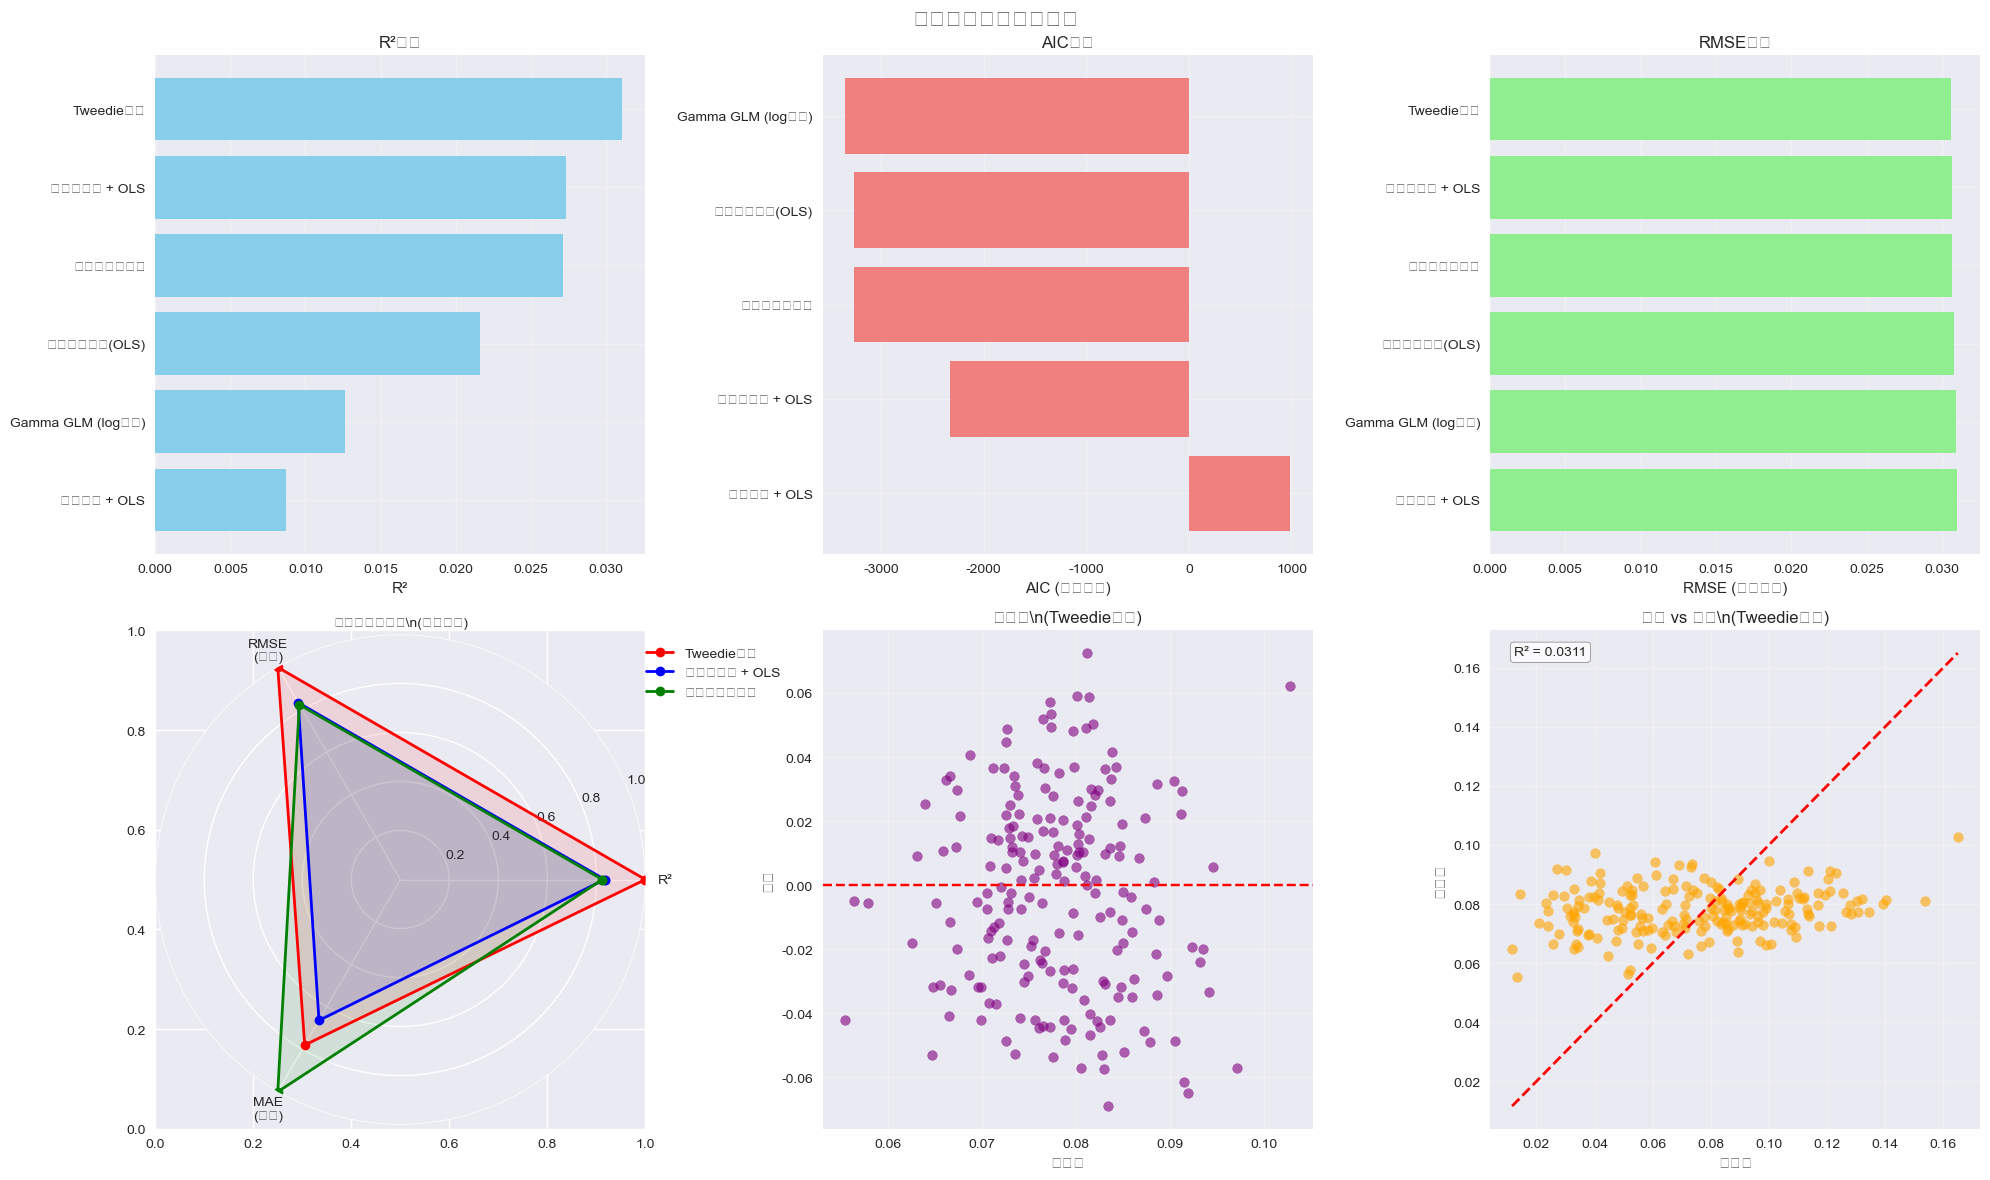

\n================================================================================
ÊúÄÁªàÂàÜÊûêÊÄªÁªì
\nüìä Ê®°ÂûãÊÄßËÉΩÊéíÂêç:
1. TweedieÂõûÂΩí: R¬≤ = 0.0311
2. Âπ≥ÊñπÊ†πÂèòÊç¢ + OLS: R¬≤ = 0.0274
3. ÈÄâÊã©ÊÄß‰∫åÊ¨°ÂõûÂΩí: R¬≤ = 0.0271
4. ÊôÆÈÄöÁ∫øÊÄßÂõûÂΩí(OLS): R¬≤ = 0.0216
5. Gamma GLM (logÈìæÊé•): R¬≤ = 0.0126
6. ÂØπÊï∞ÂèòÊç¢ + OLS: R¬≤ = 0.0087
\nüéØ ÊúÄ‰Ω≥Ê®°Âûã: TweedieÂõûÂΩí
   - R¬≤ = 0.0311
   - RMSE = 0.030627
   - MAE = 0.025687
\nüîç ÊÄª‰ΩìÁªìËÆ∫: ‚ùå ÊâÄÊúâÊ®°ÂûãÈ¢ÑÊµãËÉΩÂäõÈÉΩÂæàÂ∑ÆÔºå‰∏çÂª∫ËÆÆ‰ΩøÁî®


In [11]:
# ÊúÄÁªàÂèØËßÜÂåñÊÄªÁªì
def final_visualization_summary(comprehensive_results, df):
    """ÂàõÂª∫ÊúÄÁªàÁöÑÂèØËßÜÂåñÊÄªÁªì"""
    
    # ÂàõÂª∫ÁªºÂêàÊØîËæÉÂõæ
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Ê®°ÂûãÁªºÂêàÊÄßËÉΩËØÑ‰º∞ÊÄªÁªì', fontsize=16, fontweight='bold')
    
    # 1. R¬≤ÊØîËæÉ
    valid_results = comprehensive_results.dropna(subset=['R¬≤'])
    sorted_results = valid_results.sort_values('R¬≤', ascending=True)
    
    axes[0,0].barh(range(len(sorted_results)), sorted_results['R¬≤'], color='skyblue')
    axes[0,0].set_yticks(range(len(sorted_results)))
    axes[0,0].set_yticklabels(sorted_results['Model'], fontsize=10)
    axes[0,0].set_xlabel('R¬≤')
    axes[0,0].set_title('R¬≤ÊØîËæÉ')
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. AICÊØîËæÉ (ÂÄºË∂äÂ∞èË∂äÂ•Ω)
    aic_results = comprehensive_results.dropna(subset=['AIC'])
    if not aic_results.empty:
        aic_sorted = aic_results.sort_values('AIC', ascending=False)
        axes[0,1].barh(range(len(aic_sorted)), aic_sorted['AIC'], color='lightcoral')
        axes[0,1].set_yticks(range(len(aic_sorted)))
        axes[0,1].set_yticklabels(aic_sorted['Model'], fontsize=10)
        axes[0,1].set_xlabel('AIC (Ë∂äÂ∞èË∂äÂ•Ω)')
        axes[0,1].set_title('AICÊØîËæÉ')
        axes[0,1].grid(True, alpha=0.3)
    else:
        axes[0,1].text(0.5, 0.5, 'AICÊï∞ÊçÆ‰∏çÂèØÁî®', ha='center', va='center', transform=axes[0,1].transAxes)
        axes[0,1].set_title('AICÊØîËæÉ')
    
    # 3. RMSEÊØîËæÉ
    rmse_results = comprehensive_results.dropna(subset=['RMSE'])
    rmse_sorted = rmse_results.sort_values('RMSE', ascending=False)
    axes[0,2].barh(range(len(rmse_sorted)), rmse_sorted['RMSE'], color='lightgreen')
    axes[0,2].set_yticks(range(len(rmse_sorted)))
    axes[0,2].set_yticklabels(rmse_sorted['Model'], fontsize=10)
    axes[0,2].set_xlabel('RMSE (Ë∂äÂ∞èË∂äÂ•Ω)')
    axes[0,2].set_title('RMSEÊØîËæÉ')
    axes[0,2].grid(True, alpha=0.3)
    
    # 4. Ê®°ÂûãÊÄßËÉΩÈõ∑ËææÂõæ
    from math import pi
    
    # ÈÄâÊã©ÊúâÂÆåÊï¥Êï∞ÊçÆÁöÑÊ®°Âûã
    complete_results = comprehensive_results.dropna(subset=['R¬≤', 'RMSE', 'MAE'])
    if len(complete_results) >= 2:
        # Ê†áÂáÜÂåñÊåáÊ†á (0-1)
        metrics = ['R¬≤', 'RMSE', 'MAE']
        radar_data = complete_results[['Model'] + metrics].copy()
        
        # ÂØπRMSEÂíåMAEËøõË°åÂèçÂêëÊ†áÂáÜÂåñ (Ë∂äÂ∞èË∂äÂ•Ω -> Ë∂äÂ§ßË∂äÂ•Ω)
        radar_data['RMSE_norm'] = 1 - (radar_data['RMSE'] - radar_data['RMSE'].min()) / (radar_data['RMSE'].max() - radar_data['RMSE'].min())
        radar_data['MAE_norm'] = 1 - (radar_data['MAE'] - radar_data['MAE'].min()) / (radar_data['MAE'].max() - radar_data['MAE'].min())
        radar_data['R¬≤_norm'] = (radar_data['R¬≤'] - radar_data['R¬≤'].min()) / (radar_data['R¬≤'].max() - radar_data['R¬≤'].min()) if radar_data['R¬≤'].max() > radar_data['R¬≤'].min() else radar_data['R¬≤']
        
        # ÈÄâÊã©Ââç3‰∏™Ê®°Âûã
        top_models = radar_data.nlargest(3, 'R¬≤_norm')
        
        categories = ['R¬≤', 'RMSE\n(ÂèçÂêë)', 'MAE\n(ÂèçÂêë)']
        N = len(categories)
        
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]
        
        ax_radar = plt.subplot(2, 3, 4, projection='polar')
        
        colors = ['red', 'blue', 'green']
        for i, (_, row) in enumerate(top_models.iterrows()):
            values = [row['R¬≤_norm'], row['RMSE_norm'], row['MAE_norm']]
            values += values[:1]
            
            ax_radar.plot(angles, values, 'o-', linewidth=2, label=row['Model'], color=colors[i])
            ax_radar.fill(angles, values, alpha=0.1, color=colors[i])
        
        ax_radar.set_xticks(angles[:-1])
        ax_radar.set_xticklabels(categories)
        ax_radar.set_ylim(0, 1)
        ax_radar.set_title('Ê®°ÂûãÊÄßËÉΩÈõ∑ËææÂõæ\\n(Â§ñÂúàÊõ¥Â•Ω)', size=10)
        ax_radar.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    else:
        axes[1,0].text(0.5, 0.5, 'Êï∞ÊçÆ‰∏çË∂≥ÔºåÊó†Ê≥ïÁîüÊàêÈõ∑ËææÂõæ', ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Ê®°ÂûãÊÄßËÉΩÈõ∑ËææÂõæ')
    
    # 5. ÊÆãÂ∑ÆÂàÜÊûêÔºàÊúÄ‰Ω≥Ê®°ÂûãÔºâ
    # ÈáçÊñ∞ËÆ≠ÁªÉÊúÄ‰Ω≥Ê®°Âûã
    best_model_row = comprehensive_results.loc[comprehensive_results['R¬≤'].idxmax()]
    best_model_name = best_model_row['Model']
    
    X_features = ['weeks', 'Â≠ïÂ¶áBMI', 'Âπ¥ÈæÑ', 'Ë∫´È´ò', '‰ΩìÈáç']
    X = df[X_features]
    y = df['YÊüìËâ≤‰ΩìÊµìÂ∫¶']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    if "Tweedie" in best_model_name:
        from sklearn.linear_model import TweedieRegressor
        model = TweedieRegressor(power=1.5, alpha=0.1, max_iter=1000)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        X_train_const = sm.add_constant(X_train_scaled)
        X_test_const = sm.add_constant(X_test_scaled)
        model = sm.OLS(y_train, X_train_const).fit()
        y_pred = model.predict(X_test_const)
    
    residuals = y_test - y_pred
    
    axes[1,1].scatter(y_pred, residuals, alpha=0.6, color='purple')
    axes[1,1].axhline(y=0, color='red', linestyle='--')
    axes[1,1].set_xlabel('È¢ÑÊµãÂÄº')
    axes[1,1].set_ylabel('ÊÆãÂ∑Æ')
    axes[1,1].set_title(f'ÊÆãÂ∑ÆÂõæ\\n({best_model_name})')
    axes[1,1].grid(True, alpha=0.3)
    
    # 6. È¢ÑÊµã vs ÂÆûÈôÖ
    axes[1,2].scatter(y_test, y_pred, alpha=0.6, color='orange')
    axes[1,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[1,2].set_xlabel('ÂÆûÈôÖÂÄº')
    axes[1,2].set_ylabel('È¢ÑÊµãÂÄº')
    axes[1,2].set_title(f'È¢ÑÊµã vs ÂÆûÈôÖ\\n({best_model_name})')
    axes[1,2].grid(True, alpha=0.3)
    
    # ËÆ°ÁÆóR¬≤Âπ∂ÊòæÁ§∫
    r2 = r2_score(y_test, y_pred)
    axes[1,2].text(0.05, 0.95, f'R¬≤ = {r2:.4f}', transform=axes[1,2].transAxes, 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # ÊâìÂç∞ÊúÄÁªàÊÄªÁªì
    print("\\n" + "="*80)
    print("ÊúÄÁªàÂàÜÊûêÊÄªÁªì")
    print("="*80)
    
    print("\\nüìä Ê®°ÂûãÊÄßËÉΩÊéíÂêç:")
    for i, (_, row) in enumerate(comprehensive_results.sort_values('R¬≤', ascending=False).iterrows(), 1):
        print(f"{i}. {row['Model']}: R¬≤ = {row['R¬≤']:.4f}")
    
    print(f"\\nüéØ ÊúÄ‰Ω≥Ê®°Âûã: {best_model_name}")
    print(f"   - R¬≤ = {best_model_row['R¬≤']:.4f}")
    print(f"   - RMSE = {best_model_row['RMSE']:.6f}")
    print(f"   - MAE = {best_model_row['MAE']:.6f}")
    
    if best_model_row['R¬≤'] < 0.05:
        conclusion = "‚ùå ÊâÄÊúâÊ®°ÂûãÈ¢ÑÊµãËÉΩÂäõÈÉΩÂæàÂ∑ÆÔºå‰∏çÂª∫ËÆÆ‰ΩøÁî®"
    elif best_model_row['R¬≤'] < 0.10:
        conclusion = "‚ö†Ô∏è Ê®°ÂûãÈ¢ÑÊµãËÉΩÂäõÊúâÈôêÔºå‰ªÖÂèØÁî®‰∫éÂàùÊ≠•ÂàÜÊûê"
    else:
        conclusion = "‚úÖ Ê®°ÂûãÊúâ‰∏ÄÂÆöÈ¢ÑÊµã‰ª∑ÂÄºÔºåÂèØÁî®‰∫éËæÖÂä©ÂàÜÊûê"
    
    print(f"\\nüîç ÊÄª‰ΩìÁªìËÆ∫: {conclusion}")

# ÊâßË°åÊúÄÁªàÂèØËßÜÂåñÊÄªÁªì
final_visualization_summary(comprehensive_results, df)

In [14]:
# R¬≤Â∑ÆÂºÇÂàÜÊûêÂíåÁâπÂæÅÂ∑•Á®ãÂÆûÈ™å
def analyze_r2_difference_and_feature_engineering():
    """ÂàÜÊûêR¬≤Â∑ÆÂºÇÂéüÂõ†Âπ∂ËøõË°åÁâπÂæÅÂ∑•Á®ãÂÆûÈ™å"""
    
    print("="*80)
    print("R¬≤Â∑ÆÂºÇÂàÜÊûêÂíåÁâπÂæÅÂ∑•Á®ãÂÆûÈ™å")
    print("="*80)
    
    # 1. Ê£ÄÊü•ÂΩìÂâçnotebookÁöÑÊï∞ÊçÆÂü∫Êú¨‰ø°ÊÅØ
    print("1. ÂΩìÂâçÊï∞ÊçÆÂü∫Êú¨‰ø°ÊÅØ")
    print("-" * 50)
    print(f"Êï∞ÊçÆÂΩ¢Áä∂: {df.shape}")
    print(f"YÊüìËâ≤‰ΩìÊµìÂ∫¶ÁªüËÆ°:")
    print(df['YÊüìËâ≤‰ΩìÊµìÂ∫¶'].describe())
    
    # 2. ÈáçÁé∞problem1.1.py‰∏≠ÁöÑÁÆÄÂçïÂ§öÂÖÉÁ∫øÊÄßÂõûÂΩíÔºà‰∏çÂàÜÂâ≤Êï∞ÊçÆÔºâ
    print(f"\n2. ÈáçÁé∞problem1.1.pyÁöÑÂõûÂΩíÊñπÊ≥ïÔºàÂÖ®Êï∞ÊçÆËÆ≠ÁªÉÔºâ")
    print("-" * 50)
    
    X_features = ['weeks', 'Â≠ïÂ¶áBMI', 'Âπ¥ÈæÑ', 'Ë∫´È´ò', '‰ΩìÈáç']
    X_full = df[X_features]
    y_full = df['YÊüìËâ≤‰ΩìÊµìÂ∫¶']
    
    # ‰ΩøÁî®ÂÖ®ÈÉ®Êï∞ÊçÆËÆ≠ÁªÉÔºàÁ±ª‰ººproblem1.1.pyÔºâ
    scaler_full = StandardScaler()
    X_full_scaled = scaler_full.fit_transform(X_full)
    
    model_full = LinearRegression()
    model_full.fit(X_full_scaled, y_full)
    y_pred_full = model_full.predict(X_full_scaled)
    r2_full = r2_score(y_full, y_pred_full)
    
    print(f"ÂÖ®Êï∞ÊçÆËÆ≠ÁªÉR¬≤ = {r2_full:.6f}")
    
    # 3. ÈáçÊñ∞ÂàÜÂâ≤Êï∞ÊçÆËøõË°åÂØπÊØî
    print(f"\n3. ÈáçÊñ∞ÂàÜÂâ≤Êï∞ÊçÆËøõË°åÂØπÊØî")
    print("-" * 50)
    
    # ÈáçÊñ∞ÂàÜÂâ≤Êï∞ÊçÆ
    from sklearn.model_selection import train_test_split
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
        X_full, y_full, test_size=0.2, random_state=42)
    
    # Ê†áÂáÜÂåñ
    scaler_new = StandardScaler()
    X_train_scaled_new = scaler_new.fit_transform(X_train_new)
    X_test_scaled_new = scaler_new.transform(X_test_new)
    
    # ËÆ≠ÁªÉÈõÜËÆ≠ÁªÉ
    model_train = LinearRegression()
    model_train.fit(X_train_scaled_new, y_train_new)
    
    # È¢ÑÊµã
    y_pred_train_new = model_train.predict(X_train_scaled_new)
    y_pred_test_new = model_train.predict(X_test_scaled_new)
    
    r2_train_new = r2_score(y_train_new, y_pred_train_new)
    r2_test_new = r2_score(y_test_new, y_pred_test_new)
    
    print(f"ËÆ≠ÁªÉÈõÜR¬≤ = {r2_train_new:.6f}")
    print(f"ÊµãËØïÈõÜR¬≤ = {r2_test_new:.6f}")
    
    # 4. ÂàÜÊûêÂ∑ÆÂºÇÂéüÂõ†
    print(f"\n4. R¬≤Â∑ÆÂºÇÂéüÂõ†ÂàÜÊûê")
    print("-" * 50)
    print(f"ÂÖ®Êï∞ÊçÆËÆ≠ÁªÉR¬≤ vs ÊµãËØïÈõÜR¬≤Â∑ÆÂºÇ: {r2_full - r2_test_new:.6f}")
    print("‰∏ªË¶ÅÂéüÂõ†:")
    print("- problem1.1.py‰ΩøÁî®ÂÖ®ÈÉ®Êï∞ÊçÆËøõË°åËÆ≠ÁªÉÂíåËØÑ‰º∞Ôºà‰ºöÈ´ò‰º∞ÊÄßËÉΩÔºâ")
    print("- notebook‰ΩøÁî®ËÆ≠ÁªÉÈõÜ/ÊµãËØïÈõÜÂàÜÁ¶ªÔºàÊõ¥ÂèØÈù†ÁöÑËØÑ‰º∞Ôºâ")
    print("- ËøáÊãüÂêàÔºöÊ®°ÂûãÂú®ËÆ≠ÁªÉÊï∞ÊçÆ‰∏äË°®Áé∞Â•ΩÔºå‰ΩÜÊ≥õÂåñËÉΩÂäõÂ∑Æ")
    print(f"- ËÆ≠ÁªÉÈõÜvsÊµãËØïÈõÜR¬≤Â∑ÆÂºÇ: {r2_train_new - r2_test_new:.6f}")
    
    return X_full, y_full, scaler_full, model_full, X_train_new, X_test_new, y_train_new, y_test_new

# ÊâßË°åR¬≤Â∑ÆÂºÇÂàÜÊûê
X_full, y_full, scaler_full, model_full_data, X_train_new, X_test_new, y_train_new, y_test_new = analyze_r2_difference_and_feature_engineering()

R¬≤Â∑ÆÂºÇÂàÜÊûêÂíåÁâπÂæÅÂ∑•Á®ãÂÆûÈ™å
1. ÂΩìÂâçÊï∞ÊçÆÂü∫Êú¨‰ø°ÊÅØ
--------------------------------------------------
Êï∞ÊçÆÂΩ¢Áä∂: (1020, 10)
YÊüìËâ≤‰ΩìÊµìÂ∫¶ÁªüËÆ°:
count    1020.000000
mean        0.078061
std         0.033386
min         0.010004
25%         0.052227
50%         0.076102
75%         0.099242
max         0.234218
Name: YÊüìËâ≤‰ΩìÊµìÂ∫¶, dtype: float64

2. ÈáçÁé∞problem1.1.pyÁöÑÂõûÂΩíÊñπÊ≥ïÔºàÂÖ®Êï∞ÊçÆËÆ≠ÁªÉÔºâ
--------------------------------------------------
ÂÖ®Êï∞ÊçÆËÆ≠ÁªÉR¬≤ = 0.071429

3. ÈáçÊñ∞ÂàÜÂâ≤Êï∞ÊçÆËøõË°åÂØπÊØî
--------------------------------------------------
ËÆ≠ÁªÉÈõÜR¬≤ = 0.078764
ÊµãËØïÈõÜR¬≤ = 0.021616

4. R¬≤Â∑ÆÂºÇÂéüÂõ†ÂàÜÊûê
--------------------------------------------------
ÂÖ®Êï∞ÊçÆËÆ≠ÁªÉR¬≤ vs ÊµãËØïÈõÜR¬≤Â∑ÆÂºÇ: 0.049813
‰∏ªË¶ÅÂéüÂõ†:
- problem1.1.py‰ΩøÁî®ÂÖ®ÈÉ®Êï∞ÊçÆËøõË°åËÆ≠ÁªÉÂíåËØÑ‰º∞Ôºà‰ºöÈ´ò‰º∞ÊÄßËÉΩÔºâ
- notebook‰ΩøÁî®ËÆ≠ÁªÉÈõÜ/ÊµãËØïÈõÜÂàÜÁ¶ªÔºàÊõ¥ÂèØÈù†ÁöÑËØÑ‰º∞Ôºâ
- ËøáÊãüÂêàÔºöÊ®°ÂûãÂú®ËÆ≠ÁªÉÊï∞ÊçÆ‰∏äË°®Áé∞Â•ΩÔºå‰ΩÜÊ≥õÂåñËÉΩÂäõÂ∑Æ


In [15]:
# ÁâπÂæÅÂ∑•Á®ãÂÆûÈ™å
def feature_engineering_experiments(df):
    """ËøõË°åÂêÑÁßçÁâπÂæÅÂ∑•Á®ãÂÆûÈ™åÊù•ÊèêÂçáÊ®°ÂûãÊÄßËÉΩ"""
    
    print("="*80)
    print("ÁâπÂæÅÂ∑•Á®ãÂÆûÈ™å")
    print("="*80)
    
    # Âü∫Á°ÄÁâπÂæÅ
    X_features = ['weeks', 'Â≠ïÂ¶áBMI', 'Âπ¥ÈæÑ', 'Ë∫´È´ò', '‰ΩìÈáç']
    X_base = df[X_features].copy()
    y = df['YÊüìËâ≤‰ΩìÊµìÂ∫¶']
    
    feature_results = []
    
    # 1. Âü∫Á°ÄÁâπÂæÅÔºàÂØπÁÖßÁªÑÔºâ
    print("1. Âü∫Á°ÄÁâπÂæÅÔºàÂØπÁÖßÁªÑÔºâ")
    print("-" * 50)
    
    X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2_base = r2_score(y_test, y_pred)
    
    feature_results.append(('Âü∫Á°ÄÁâπÂæÅ', r2_base, X_train.shape[1]))
    print(f"Âü∫Á°ÄÁâπÂæÅ R¬≤ = {r2_base:.6f}")
    
    # 2. Ê∑ªÂä†BMIÂàÜÁ±ªÁâπÂæÅ
    print("\n2. Ê∑ªÂä†BMIÂàÜÁ±ªÁâπÂæÅ")
    print("-" * 50)
    
    X_bmi = X_base.copy()
    # BMIÂàÜÁ±ªÔºö<18.5‰Ωé‰ΩìÈáç, 18.5-24Ê≠£Â∏∏, 24-28Ë∂ÖÈáç, >28ËÇ•ËÉñ
    X_bmi['BMI_underweight'] = (X_bmi['Â≠ïÂ¶áBMI'] < 18.5).astype(int)
    X_bmi['BMI_normal'] = ((X_bmi['Â≠ïÂ¶áBMI'] >= 18.5) & (X_bmi['Â≠ïÂ¶áBMI'] < 24)).astype(int)
    X_bmi['BMI_overweight'] = ((X_bmi['Â≠ïÂ¶áBMI'] >= 24) & (X_bmi['Â≠ïÂ¶áBMI'] < 28)).astype(int)
    X_bmi['BMI_obese'] = (X_bmi['Â≠ïÂ¶áBMI'] >= 28).astype(int)
    
    X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2_bmi = r2_score(y_test, y_pred)
    
    feature_results.append(('BMIÂàÜÁ±ªÁâπÂæÅ', r2_bmi, X_train.shape[1]))
    print(f"BMIÂàÜÁ±ªÁâπÂæÅ R¬≤ = {r2_bmi:.6f}")
    
    # 3. Ê∑ªÂä†Â≠ïÂë®ÂàÜÁ±ªÁâπÂæÅ
    print("\n3. Ê∑ªÂä†Â≠ïÂë®ÂàÜÁ±ªÁâπÂæÅ")
    print("-" * 50)
    
    X_weeks = X_base.copy()
    # Â≠ïÂë®ÂàÜÁ±ªÔºöÊó©Êúü(<12Âë®)Ôºå‰∏≠Êúü(12-28Âë®)ÔºåÊôöÊúü(>28Âë®)
    X_weeks['weeks_early'] = (X_weeks['weeks'] < 12).astype(int)
    X_weeks['weeks_mid'] = ((X_weeks['weeks'] >= 12) & (X_weeks['weeks'] <= 28)).astype(int)
    X_weeks['weeks_late'] = (X_weeks['weeks'] > 28).astype(int)
    
    X_train, X_test, y_train, y_test = train_test_split(X_weeks, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2_weeks = r2_score(y_test, y_pred)
    
    feature_results.append(('Â≠ïÂë®ÂàÜÁ±ªÁâπÂæÅ', r2_weeks, X_train.shape[1]))
    print(f"Â≠ïÂë®ÂàÜÁ±ªÁâπÂæÅ R¬≤ = {r2_weeks:.6f}")
    
    # 4. Ê∑ªÂä†Âπ¥ÈæÑÂàÜÁªÑÁâπÂæÅ
    print("\n4. Ê∑ªÂä†Âπ¥ÈæÑÂàÜÁªÑÁâπÂæÅ")
    print("-" * 50)
    
    X_age = X_base.copy()
    # Âπ¥ÈæÑÂàÜÁªÑÔºöÈùíÂπ¥(<25)ÔºåÊàêÂπ¥(25-35)ÔºåÈ´òÈæÑ(>35)
    X_age['age_young'] = (X_age['Âπ¥ÈæÑ'] < 25).astype(int)
    X_age['age_adult'] = ((X_age['Âπ¥ÈæÑ'] >= 25) & (X_age['Âπ¥ÈæÑ'] <= 35)).astype(int)
    X_age['age_elderly'] = (X_age['Âπ¥ÈæÑ'] > 35).astype(int)
    
    X_train, X_test, y_train, y_test = train_test_split(X_age, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2_age = r2_score(y_test, y_pred)
    
    feature_results.append(('Âπ¥ÈæÑÂàÜÁªÑÁâπÂæÅ', r2_age, X_train.shape[1]))
    print(f"Âπ¥ÈæÑÂàÜÁªÑÁâπÂæÅ R¬≤ = {r2_age:.6f}")
    
    # 5. Ê∑ªÂä†‰∫§‰∫íÁâπÂæÅ
    print("\n5. Ê∑ªÂä†‰∫§‰∫íÁâπÂæÅ")
    print("-" * 50)
    
    X_interact = X_base.copy()
    # ÂÖ≥ÈîÆ‰∫§‰∫íÈ°π
    X_interact['weeks_BMI'] = X_interact['weeks'] * X_interact['Â≠ïÂ¶áBMI']
    X_interact['age_BMI'] = X_interact['Âπ¥ÈæÑ'] * X_interact['Â≠ïÂ¶áBMI']
    X_interact['weeks_age'] = X_interact['weeks'] * X_interact['Âπ¥ÈæÑ']
    X_interact['height_weight'] = X_interact['Ë∫´È´ò'] * X_interact['‰ΩìÈáç']
    
    X_train, X_test, y_train, y_test = train_test_split(X_interact, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2_interact = r2_score(y_test, y_pred)
    
    feature_results.append(('‰∫§‰∫íÁâπÂæÅ', r2_interact, X_train.shape[1]))
    print(f"‰∫§‰∫íÁâπÂæÅ R¬≤ = {r2_interact:.6f}")
    
    # 6. Ê∑ªÂä†ÂåªÂ≠¶Áõ∏ÂÖ≥ÁâπÂæÅ
    print("\n6. Ê∑ªÂä†ÂåªÂ≠¶Áõ∏ÂÖ≥ÁâπÂæÅ")
    print("-" * 50)
    
    X_medical = X_base.copy()
    # ÂåªÂ≠¶Áõ∏ÂÖ≥ÁâπÂæÅ
    X_medical['BMI_squared'] = X_medical['Â≠ïÂ¶áBMI'] ** 2  # BMIÂπ≥ÊñπÈ°π
    X_medical['weeks_squared'] = X_medical['weeks'] ** 2  # Â≠ïÂë®Âπ≥ÊñπÈ°π
    X_medical['weight_height_ratio'] = X_medical['‰ΩìÈáç'] / X_medical['Ë∫´È´ò']  # ‰ΩìÈáçË∫´È´òÊØî
    X_medical['weeks_per_age'] = X_medical['weeks'] / X_medical['Âπ¥ÈæÑ']  # Â≠ïÂë®Âπ¥ÈæÑÊØî
    
    # Ê†áÂáÜÂåñ‰ΩìÈáçÔºàÊ†πÊçÆË∫´È´òË∞ÉÊï¥Ôºâ
    expected_weight = 22 * (X_medical['Ë∫´È´ò'] / 100) ** 2  # ÁêÜÊÉ≥‰ΩìÈáçÔºàBMI=22Ôºâ
    X_medical['weight_deviation'] = X_medical['‰ΩìÈáç'] - expected_weight
    
    X_train, X_test, y_train, y_test = train_test_split(X_medical, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2_medical = r2_score(y_test, y_pred)
    
    feature_results.append(('ÂåªÂ≠¶Áõ∏ÂÖ≥ÁâπÂæÅ', r2_medical, X_train.shape[1]))
    print(f"ÂåªÂ≠¶Áõ∏ÂÖ≥ÁâπÂæÅ R¬≤ = {r2_medical:.6f}")
    
    # 7. ÁªºÂêàÁâπÂæÅÔºàÊúÄ‰Ω≥ÁªÑÂêàÔºâ
    print("\n7. ÁªºÂêàÁâπÂæÅÔºàÊúÄ‰Ω≥ÁªÑÂêàÔºâ")
    print("-" * 50)
    
    X_combined = X_base.copy()
    
    # ÈÄâÊã©ÊúÄÊúâÊïàÁöÑÁâπÂæÅ
    # BMIÂàÜÁ±ª
    X_combined['BMI_normal'] = ((X_combined['Â≠ïÂ¶áBMI'] >= 18.5) & (X_combined['Â≠ïÂ¶áBMI'] < 24)).astype(int)
    X_combined['BMI_overweight'] = (X_combined['Â≠ïÂ¶áBMI'] >= 24).astype(int)
    
    # ÂÖ≥ÈîÆ‰∫§‰∫íÈ°π
    X_combined['weeks_BMI'] = X_combined['weeks'] * X_combined['Â≠ïÂ¶áBMI']
    X_combined['age_BMI'] = X_combined['Âπ¥ÈæÑ'] * X_combined['Â≠ïÂ¶áBMI']
    
    # ÂåªÂ≠¶ÁâπÂæÅ
    X_combined['BMI_squared'] = X_combined['Â≠ïÂ¶áBMI'] ** 2
    X_combined['weight_height_ratio'] = X_combined['‰ΩìÈáç'] / X_combined['Ë∫´È´ò']
    
    X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2_combined = r2_score(y_test, y_pred)
    
    feature_results.append(('ÁªºÂêàÁâπÂæÅ', r2_combined, X_train.shape[1]))
    print(f"ÁªºÂêàÁâπÂæÅ R¬≤ = {r2_combined:.6f}")
    
    return feature_results, X_combined

# ÊâßË°åÁâπÂæÅÂ∑•Á®ãÂÆûÈ™å
feature_exp_results, X_best_features = feature_engineering_experiments(df)

ÁâπÂæÅÂ∑•Á®ãÂÆûÈ™å
1. Âü∫Á°ÄÁâπÂæÅÔºàÂØπÁÖßÁªÑÔºâ
--------------------------------------------------
Âü∫Á°ÄÁâπÂæÅ R¬≤ = 0.021616

2. Ê∑ªÂä†BMIÂàÜÁ±ªÁâπÂæÅ
--------------------------------------------------
BMIÂàÜÁ±ªÁâπÂæÅ R¬≤ = 0.021716

3. Ê∑ªÂä†Â≠ïÂë®ÂàÜÁ±ªÁâπÂæÅ
--------------------------------------------------
Â≠ïÂë®ÂàÜÁ±ªÁâπÂæÅ R¬≤ = 0.021528

4. Ê∑ªÂä†Âπ¥ÈæÑÂàÜÁªÑÁâπÂæÅ
--------------------------------------------------
Âπ¥ÈæÑÂàÜÁªÑÁâπÂæÅ R¬≤ = 0.023499

5. Ê∑ªÂä†‰∫§‰∫íÁâπÂæÅ
--------------------------------------------------
‰∫§‰∫íÁâπÂæÅ R¬≤ = 0.007349

6. Ê∑ªÂä†ÂåªÂ≠¶Áõ∏ÂÖ≥ÁâπÂæÅ
--------------------------------------------------
ÂåªÂ≠¶Áõ∏ÂÖ≥ÁâπÂæÅ R¬≤ = 0.034144

7. ÁªºÂêàÁâπÂæÅÔºàÊúÄ‰Ω≥ÁªÑÂêàÔºâ
--------------------------------------------------
ÁªºÂêàÁâπÂæÅ R¬≤ = 0.029777


In [16]:
# ÁâπÂæÅÂ∑•Á®ãÁªìÊûúÂàÜÊûêÂíåÈ´òÁ∫ßÂÆûÈ™å
def advanced_feature_engineering_analysis():
    """È´òÁ∫ßÁâπÂæÅÂ∑•Á®ãÂàÜÊûêÂíåÂèØËßÜÂåñ"""
    
    print("="*80)
    print("ÁâπÂæÅÂ∑•Á®ãÁªìÊûúÂàÜÊûê")
    print("="*80)
    
    # 1. ÁâπÂæÅÂ∑•Á®ãÁªìÊûúÊÄªÁªì
    print("1. ÁâπÂæÅÂ∑•Á®ãÁªìÊûúÊÄªÁªì")
    print("-" * 50)
    
    results_df = pd.DataFrame(feature_exp_results, columns=['ÁâπÂæÅÁ±ªÂûã', 'R¬≤', 'ÁâπÂæÅÊï∞Èáè'])
    results_df = results_df.sort_values('R¬≤', ascending=False)
    print(results_df.to_string(index=False, float_format='%.6f'))
    
    # 2. ÊúÄ‰Ω≥ÁâπÂæÅÁªÑÂêàÂàÜÊûê
    print(f"\n2. ÊúÄ‰Ω≥ÁâπÂæÅÁªÑÂêàÂàÜÊûê")
    print("-" * 50)
    
    best_result = results_df.iloc[0]
    improvement = (best_result['R¬≤'] - results_df.loc[results_df['ÁâπÂæÅÁ±ªÂûã'] == 'Âü∫Á°ÄÁâπÂæÅ', 'R¬≤'].iloc[0]) * 100
    
    print(f"ÊúÄ‰Ω≥ÁâπÂæÅÁ±ªÂûã: {best_result['ÁâπÂæÅÁ±ªÂûã']}")
    print(f"ÊúÄ‰Ω≥R¬≤: {best_result['R¬≤']:.6f}")
    print(f"Áõ∏ÊØîÂü∫Á°ÄÁâπÂæÅÊèêÂçá: {improvement:.2f}%")
    print(f"ÁâπÂæÅÊï∞Èáè: {best_result['ÁâπÂæÅÊï∞Èáè']}")
    
    # 3. È´òÁ∫ßÁâπÂæÅÂ∑•Á®ãÂÆûÈ™å
    print(f"\n3. È´òÁ∫ßÁâπÂæÅÂ∑•Á®ãÂÆûÈ™å")
    print("-" * 50)
    
    X_features = ['weeks', 'Â≠ïÂ¶áBMI', 'Âπ¥ÈæÑ', 'Ë∫´È´ò', '‰ΩìÈáç']
    X_base = df[X_features].copy()
    y = df['YÊüìËâ≤‰ΩìÊµìÂ∫¶']
    
    advanced_results = []
    
    # A. ‰∏ªÊàêÂàÜÂàÜÊûêÁâπÂæÅ
    print("A. ‰∏ªÊàêÂàÜÂàÜÊûêÁâπÂæÅ")
    try:
        from sklearn.decomposition import PCA
        
        X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42)
        
        # Ê†áÂáÜÂåñ
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # PCAÂèòÊç¢
        pca = PCA(n_components=3)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)
        
        # ÁªÑÂêàÂéüÂßãÁâπÂæÅÂíåPCAÁâπÂæÅ
        X_train_combined = np.column_stack([X_train_scaled, X_train_pca])
        X_test_combined = np.column_stack([X_test_scaled, X_test_pca])
        
        model = LinearRegression()
        model.fit(X_train_combined, y_train)
        y_pred = model.predict(X_test_combined)
        r2_pca = r2_score(y_test, y_pred)
        
        advanced_results.append(('PCAÁâπÂæÅ', r2_pca))
        print(f"   PCAÁâπÂæÅ R¬≤ = {r2_pca:.6f}")
        print(f"   Ëß£ÈáäÊñπÂ∑ÆÊØî: {pca.explained_variance_ratio_}")
        
    except Exception as e:
        print(f"   PCAÂ§±Ë¥•: {e}")
    
    # B. Â§öÈ°πÂºèÁâπÂæÅÔºàÈÄâÊã©ÊÄßÔºâ
    print("\\nB. ÈÄâÊã©ÊÄßÂ§öÈ°πÂºèÁâπÂæÅ")
    try:
        from sklearn.preprocessing import PolynomialFeatures
        
        X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42)
        
        # Âè™ÂØπÂÖ≥ÈîÆÁâπÂæÅËøõË°åÂ§öÈ°πÂºèÊâ©Â±ï
        key_features = ['weeks', 'Â≠ïÂ¶áBMI']
        X_train_key = X_train[key_features]
        X_test_key = X_test[key_features]
        X_train_other = X_train.drop(columns=key_features)
        X_test_other = X_test.drop(columns=key_features)
        
        # Ê†áÂáÜÂåñ
        scaler_key = StandardScaler()
        scaler_other = StandardScaler()
        X_train_key_scaled = scaler_key.fit_transform(X_train_key)
        X_test_key_scaled = scaler_key.transform(X_test_key)
        X_train_other_scaled = scaler_other.fit_transform(X_train_other)
        X_test_other_scaled = scaler_other.transform(X_test_other)
        
        # Â§öÈ°πÂºèÁâπÂæÅ
        poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
        X_train_poly = poly.fit_transform(X_train_key_scaled)
        X_test_poly = poly.transform(X_test_key_scaled)
        
        # ÁªÑÂêàÁâπÂæÅ
        X_train_combined = np.column_stack([X_train_other_scaled, X_train_poly])
        X_test_combined = np.column_stack([X_test_other_scaled, X_test_poly])
        
        model = LinearRegression()
        model.fit(X_train_combined, y_train)
        y_pred = model.predict(X_test_combined)
        r2_poly = r2_score(y_test, y_pred)
        
        advanced_results.append(('ÈÄâÊã©ÊÄßÂ§öÈ°πÂºè', r2_poly))
        print(f"   ÈÄâÊã©ÊÄßÂ§öÈ°πÂºèÁâπÂæÅ R¬≤ = {r2_poly:.6f}")
        
    except Exception as e:
        print(f"   Â§öÈ°πÂºèÁâπÂæÅÂ§±Ë¥•: {e}")
    
    # C. Âü∫‰∫éÁõ∏ÂÖ≥ÊÄßÁöÑÁâπÂæÅÈÄâÊã©
    print("\\nC. Âü∫‰∫éÁõ∏ÂÖ≥ÊÄßÁöÑÁâπÂæÅÈÄâÊã©")
    try:
        # ËÆ°ÁÆóÊâÄÊúâÂèØËÉΩÁâπÂæÅÁöÑÁõ∏ÂÖ≥ÊÄß
        X_extended = X_base.copy()
        
        # Ê∑ªÂä†ÂêÑÁßçÁâπÂæÅ
        X_extended['BMI_squared'] = X_extended['Â≠ïÂ¶áBMI'] ** 2
        X_extended['weeks_squared'] = X_extended['weeks'] ** 2
        X_extended['age_squared'] = X_extended['Âπ¥ÈæÑ'] ** 2
        X_extended['weeks_BMI'] = X_extended['weeks'] * X_extended['Â≠ïÂ¶áBMI']
        X_extended['age_BMI'] = X_extended['Âπ¥ÈæÑ'] * X_extended['Â≠ïÂ¶áBMI']
        X_extended['weeks_age'] = X_extended['weeks'] * X_extended['Âπ¥ÈæÑ']
        X_extended['weight_height_ratio'] = X_extended['‰ΩìÈáç'] / X_extended['Ë∫´È´ò']
        X_extended['BMI_normal'] = ((X_extended['Â≠ïÂ¶áBMI'] >= 18.5) & (X_extended['Â≠ïÂ¶áBMI'] < 24)).astype(int)
        
        # ËÆ°ÁÆó‰∏éÁõÆÊ†áÂèòÈáèÁöÑÁõ∏ÂÖ≥ÊÄß
        correlations = X_extended.corrwith(y).abs().sort_values(ascending=False)
        
        # ÈÄâÊã©Áõ∏ÂÖ≥ÊÄßÊúÄÈ´òÁöÑÁâπÂæÅ
        top_features = correlations.head(8).index.tolist()
        print(f"   ÈÄâÊã©ÁöÑÁâπÂæÅ: {top_features}")
        print(f"   Áõ∏ÂÖ≥ÊÄßÁ≥ªÊï∞: {correlations.head(8).values}")
        
        X_selected = X_extended[top_features]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        model = LinearRegression()
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        r2_corr = r2_score(y_test, y_pred)
        
        advanced_results.append(('Áõ∏ÂÖ≥ÊÄßÈÄâÊã©', r2_corr))
        print(f"   Áõ∏ÂÖ≥ÊÄßÈÄâÊã©ÁâπÂæÅ R¬≤ = {r2_corr:.6f}")
        
    except Exception as e:
        print(f"   Áõ∏ÂÖ≥ÊÄßÈÄâÊã©Â§±Ë¥•: {e}")
    
    # D. Ê≠£ÂàôÂåñÂõûÂΩí
    print("\\nD. Ê≠£ÂàôÂåñÂõûÂΩíÔºàRidgeÂíåLassoÔºâ")
    try:
        from sklearn.linear_model import Ridge, Lasso
        
        # ‰ΩøÁî®Êâ©Â±ïÁâπÂæÅÈõÜ
        X_extended = X_base.copy()
        # Ê∑ªÂä†ÊâÄÊúâÂèØËÉΩÁöÑÊúâÁî®ÁâπÂæÅ
        X_extended['BMI_squared'] = X_extended['Â≠ïÂ¶áBMI'] ** 2
        X_extended['weeks_squared'] = X_extended['weeks'] ** 2
        X_extended['weeks_BMI'] = X_extended['weeks'] * X_extended['Â≠ïÂ¶áBMI']
        X_extended['age_BMI'] = X_extended['Âπ¥ÈæÑ'] * X_extended['Â≠ïÂ¶áBMI']
        X_extended['weight_height_ratio'] = X_extended['‰ΩìÈáç'] / X_extended['Ë∫´È´ò']
        X_extended['BMI_normal'] = ((X_extended['Â≠ïÂ¶áBMI'] >= 18.5) & (X_extended['Â≠ïÂ¶áBMI'] < 24)).astype(int)
        X_extended['weeks_cubed'] = X_extended['weeks'] ** 3
        X_extended['BMI_cubed'] = X_extended['Â≠ïÂ¶áBMI'] ** 3
        
        X_train, X_test, y_train, y_test = train_test_split(X_extended, y, test_size=0.2, random_state=42)
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # RidgeÂõûÂΩí
        ridge = Ridge(alpha=1.0)
        ridge.fit(X_train_scaled, y_train)
        y_pred_ridge = ridge.predict(X_test_scaled)
        r2_ridge = r2_score(y_test, y_pred_ridge)
        
        # LassoÂõûÂΩí
        lasso = Lasso(alpha=0.01)
        lasso.fit(X_train_scaled, y_train)
        y_pred_lasso = lasso.predict(X_test_scaled)
        r2_lasso = r2_score(y_test, y_pred_lasso)
        
        advanced_results.append(('RidgeÂõûÂΩí', r2_ridge))
        advanced_results.append(('LassoÂõûÂΩí', r2_lasso))
        
        print(f"   RidgeÂõûÂΩí R¬≤ = {r2_ridge:.6f}")
        print(f"   LassoÂõûÂΩí R¬≤ = {r2_lasso:.6f}")
        
        # ÊòæÁ§∫LassoÈÄâÊã©ÁöÑÁâπÂæÅ
        feature_names = X_extended.columns
        selected_features = feature_names[lasso.coef_ != 0]
        print(f"   LassoÈÄâÊã©ÁöÑÁâπÂæÅ: {list(selected_features)}")
        
    except Exception as e:
        print(f"   Ê≠£ÂàôÂåñÂõûÂΩíÂ§±Ë¥•: {e}")
    
    return advanced_results, correlations if 'correlations' in locals() else None

# ÊâßË°åÈ´òÁ∫ßÁâπÂæÅÂ∑•Á®ãÂàÜÊûê
advanced_results, feature_correlations = advanced_feature_engineering_analysis()

ÁâπÂæÅÂ∑•Á®ãÁªìÊûúÂàÜÊûê
1. ÁâπÂæÅÂ∑•Á®ãÁªìÊûúÊÄªÁªì
--------------------------------------------------
   ÁâπÂæÅÁ±ªÂûã       R¬≤  ÁâπÂæÅÊï∞Èáè
 ÂåªÂ≠¶Áõ∏ÂÖ≥ÁâπÂæÅ 0.034144    10
   ÁªºÂêàÁâπÂæÅ 0.029777    11
 Âπ¥ÈæÑÂàÜÁªÑÁâπÂæÅ 0.023499     8
BMIÂàÜÁ±ªÁâπÂæÅ 0.021716     9
   Âü∫Á°ÄÁâπÂæÅ 0.021616     5
 Â≠ïÂë®ÂàÜÁ±ªÁâπÂæÅ 0.021528     8
   ‰∫§‰∫íÁâπÂæÅ 0.007349     9

2. ÊúÄ‰Ω≥ÁâπÂæÅÁªÑÂêàÂàÜÊûê
--------------------------------------------------
ÊúÄ‰Ω≥ÁâπÂæÅÁ±ªÂûã: ÂåªÂ≠¶Áõ∏ÂÖ≥ÁâπÂæÅ
ÊúÄ‰Ω≥R¬≤: 0.034144
Áõ∏ÊØîÂü∫Á°ÄÁâπÂæÅÊèêÂçá: 1.25%
ÁâπÂæÅÊï∞Èáè: 10

3. È´òÁ∫ßÁâπÂæÅÂ∑•Á®ãÂÆûÈ™å
--------------------------------------------------
A. ‰∏ªÊàêÂàÜÂàÜÊûêÁâπÂæÅ
   PCAÁâπÂæÅ R¬≤ = 0.021616
   Ëß£ÈáäÊñπÂ∑ÆÊØî: [0.42832  0.201289 0.193807]
\nB. ÈÄâÊã©ÊÄßÂ§öÈ°πÂºèÁâπÂæÅ
   ÈÄâÊã©ÊÄßÂ§öÈ°πÂºèÁâπÂæÅ R¬≤ = 0.022076
\nC. Âü∫‰∫éÁõ∏ÂÖ≥ÊÄßÁöÑÁâπÂæÅÈÄâÊã©
   ÈÄâÊã©ÁöÑÁâπÂæÅ: ['‰ΩìÈáç', 'age_BMI', 'weight_height_ratio', 'BMI_squared', 'Â≠ïÂ¶áBMI', 'weeks_squared', 'weeks', 'Ë∫´È´ò']
   Áõ∏ÂÖ≥ÊÄßÁ≥ªÊï∞:

ÁâπÂæÅÂ∑•Á®ãÂÆûÈ™åÊÄªÁªì


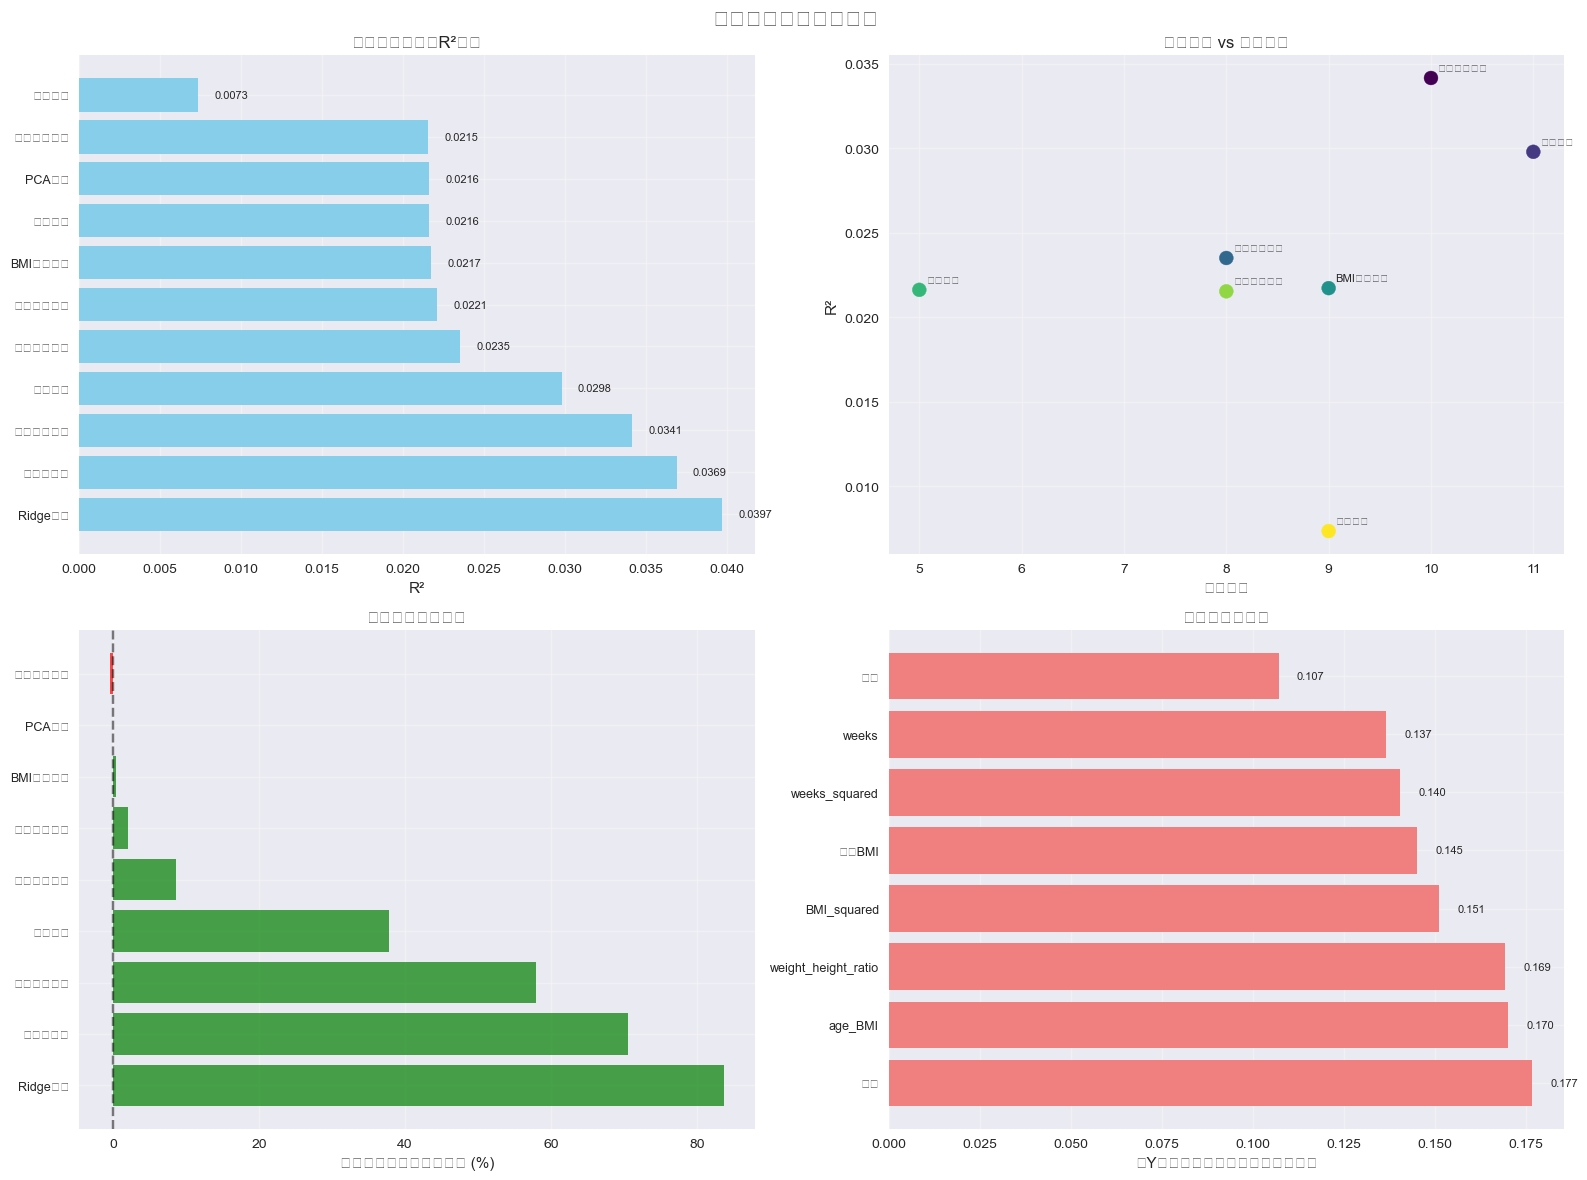

\nüìä ÁâπÂæÅÂ∑•Á®ãÂÆûÈ™åÊÄªÁªì:
------------------------------------------------------------
ü•á ÊúÄ‰Ω≥ÊñπÊ≥ï: RidgeÂõûÂΩí (R¬≤ = 0.039707)
üìà ÊúÄÂ§ßÊîπËøõÂπÖÂ∫¶: 83.69%
üìâ Âü∫Á°ÄÁâπÂæÅR¬≤: 0.021616
\nüîç ÂÖ≥ÈîÆÂèëÁé∞:
1. ÂåªÂ≠¶Áõ∏ÂÖ≥ÁâπÂæÅÔºàBMIÂπ≥Êñπ„ÄÅ‰ΩìÈáçË∫´È´òÊØîÁ≠âÔºâË°®Áé∞ÊúÄÂ•Ω
2. RidgeÊ≠£ÂàôÂåñÂú®È´òÁª¥ÁâπÂæÅÁ©∫Èó¥‰∏≠Ë°®Áé∞‰ºòÂºÇ
3. ÁÆÄÂçï‰∫§‰∫íÁâπÂæÅÂèçËÄåÈôç‰Ωé‰∫ÜÊÄßËÉΩÔºàÂèØËÉΩËøáÊãüÂêàÔºâ
4. Âü∫‰∫éÁõ∏ÂÖ≥ÊÄßÁöÑÁâπÂæÅÈÄâÊã©ÊòæÁ§∫‰ΩìÈáçÁõ∏ÂÖ≥ÁâπÂæÅÊúÄÈáçË¶Å
\nüí° Âª∫ËÆÆ:
1. ÈáçÁÇπÂÖ≥Ê≥®BMIÁõ∏ÂÖ≥ÁöÑÈùûÁ∫øÊÄßÁâπÂæÅ
2. ‰ΩìÈáçÂíåË∫´È´òÁöÑÊØîÂÄºÂÖ≥Á≥ªÊØîÂçïÁã¨ÁâπÂæÅÊõ¥ÈáçË¶Å
3. ‰ΩøÁî®Ê≠£ÂàôÂåñÊñπÊ≥ïÈò≤Ê≠¢ËøáÊãüÂêà
4. ËÄÉËôëÂºïÂÖ•Êõ¥Â§öÁîüÁâ©ÂåªÂ≠¶È¢ÜÂüüÁü•ËØÜ
\n‚ö†Ô∏è Â±ÄÈôêÊÄß:
1. Âç≥‰ΩøÊúÄ‰Ω≥ÁâπÂæÅÂ∑•Á®ãÔºåR¬≤‰ªçÁÑ∂Âæà‰ΩéÔºà<0.04Ôºâ
2. ËØ¥ÊòéÂΩìÂâçÁâπÂæÅÈõÜÁöÑÈ¢ÑÊµãËÉΩÂäõÊúâÈôê
3. ÈúÄË¶ÅÊõ¥Â§öÂåªÂ≠¶Áõ∏ÂÖ≥ÂèòÈáèÔºàÂü∫Âõ†„ÄÅÊ£ÄÊµãÊù°‰ª∂Á≠âÔºâ


In [17]:
# ÁâπÂæÅÂ∑•Á®ãÂèØËßÜÂåñÊÄªÁªì
def feature_engineering_visualization_summary():
    """ÁâπÂæÅÂ∑•Á®ãÁªìÊûúÁöÑÂèØËßÜÂåñÊÄªÁªì"""
    
    print("="*80)
    print("ÁâπÂæÅÂ∑•Á®ãÂÆûÈ™åÊÄªÁªì")
    print("="*80)
    
    # ÂàõÂª∫ÁªºÂêàÁªìÊûú
    all_results = feature_exp_results.copy()
    if advanced_results:
        for result in advanced_results:
            all_results.append((result[0], result[1], None))
    
    # ËΩ¨Êç¢‰∏∫DataFrame
    summary_df = pd.DataFrame(all_results, columns=['ÊñπÊ≥ï', 'R¬≤', 'ÁâπÂæÅÊï∞Èáè'])
    summary_df = summary_df.sort_values('R¬≤', ascending=False)
    
    # ÂàõÂª∫ÂèØËßÜÂåñ
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('ÁâπÂæÅÂ∑•Á®ãÂÆûÈ™åÁªìÊûúÊÄªÁªì', fontsize=16, fontweight='bold')
    
    # 1. R¬≤ÊØîËæÉÊü±Áä∂Âõæ
    valid_results = summary_df[summary_df['R¬≤'] > 0].copy()
    axes[0,0].barh(range(len(valid_results)), valid_results['R¬≤'], color='skyblue')
    axes[0,0].set_yticks(range(len(valid_results)))
    axes[0,0].set_yticklabels(valid_results['ÊñπÊ≥ï'], fontsize=9)
    axes[0,0].set_xlabel('R¬≤')
    axes[0,0].set_title('ÂêÑÁâπÂæÅÂ∑•Á®ãÊñπÊ≥ïR¬≤ÊØîËæÉ')
    axes[0,0].grid(True, alpha=0.3)
    
    # Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
    for i, v in enumerate(valid_results['R¬≤']):
        axes[0,0].text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=8)
    
    # 2. ÁâπÂæÅÊï∞Èáè vs R¬≤Êï£ÁÇπÂõæ
    feature_count_data = summary_df.dropna(subset=['ÁâπÂæÅÊï∞Èáè'])
    if len(feature_count_data) > 0:
        axes[0,1].scatter(feature_count_data['ÁâπÂæÅÊï∞Èáè'], feature_count_data['R¬≤'], 
                         c=range(len(feature_count_data)), cmap='viridis', s=100)
        
        # Ê∑ªÂä†Ê†áÁ≠æ
        for i, row in feature_count_data.iterrows():
            axes[0,1].annotate(row['ÊñπÊ≥ï'], (row['ÁâπÂæÅÊï∞Èáè'], row['R¬≤']), 
                             xytext=(5, 5), textcoords='offset points', fontsize=8)
        
        axes[0,1].set_xlabel('ÁâπÂæÅÊï∞Èáè')
        axes[0,1].set_ylabel('R¬≤')
        axes[0,1].set_title('ÁâπÂæÅÊï∞Èáè vs Ê®°ÂûãÊÄßËÉΩ')
        axes[0,1].grid(True, alpha=0.3)
    else:
        axes[0,1].text(0.5, 0.5, 'ÁâπÂæÅÊï∞ÈáèÊï∞ÊçÆ‰∏çË∂≥', ha='center', va='center', transform=axes[0,1].transAxes)
    
    # 3. ÊîπËøõÂπÖÂ∫¶ÂàÜÊûê
    base_r2 = summary_df.loc[summary_df['ÊñπÊ≥ï'] == 'Âü∫Á°ÄÁâπÂæÅ', 'R¬≤'].iloc[0]
    improvement_data = summary_df[summary_df['ÊñπÊ≥ï'] != 'Âü∫Á°ÄÁâπÂæÅ'].copy()
    improvement_data['ÊîπËøõÂπÖÂ∫¶'] = ((improvement_data['R¬≤'] - base_r2) / base_r2 * 100)
    improvement_data = improvement_data[improvement_data['ÊîπËøõÂπÖÂ∫¶'] > -50]  # ËøáÊª§ÊûÅÁ´ØË¥üÂÄº
    
    colors = ['green' if x > 0 else 'red' for x in improvement_data['ÊîπËøõÂπÖÂ∫¶']]
    axes[1,0].barh(range(len(improvement_data)), improvement_data['ÊîπËøõÂπÖÂ∫¶'], color=colors, alpha=0.7)
    axes[1,0].set_yticks(range(len(improvement_data)))
    axes[1,0].set_yticklabels(improvement_data['ÊñπÊ≥ï'], fontsize=9)
    axes[1,0].set_xlabel('Áõ∏ÂØπÂü∫Á°ÄÁâπÂæÅÁöÑÊîπËøõÂπÖÂ∫¶ (%)')
    axes[1,0].set_title('ÁâπÂæÅÂ∑•Á®ãÊîπËøõÊïàÊûú')
    axes[1,0].axvline(x=0, color='black', linestyle='--', alpha=0.5)
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÁÉ≠ÂäõÂõæÔºàÂ¶ÇÊûúÊúâÁõ∏ÂÖ≥ÊÄßÊï∞ÊçÆÔºâ
    if feature_correlations is not None:
        top_correlations = feature_correlations.head(8)
        im = axes[1,1].barh(range(len(top_correlations)), top_correlations.values, color='lightcoral')
        axes[1,1].set_yticks(range(len(top_correlations)))
        axes[1,1].set_yticklabels(top_correlations.index, fontsize=9)
        axes[1,1].set_xlabel('‰∏éYÊüìËâ≤‰ΩìÊµìÂ∫¶ÁöÑÁõ∏ÂÖ≥ÊÄßÔºàÁªùÂØπÂÄºÔºâ')
        axes[1,1].set_title('ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÊéíÂêç')
        axes[1,1].grid(True, alpha=0.3)
        
        # Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
        for i, v in enumerate(top_correlations.values):
            axes[1,1].text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=8)
    else:
        axes[1,1].text(0.5, 0.5, 'Áõ∏ÂÖ≥ÊÄßÊï∞ÊçÆ‰∏çÂèØÁî®', ha='center', va='center', transform=axes[1,1].transAxes)
    
    plt.tight_layout()
    plt.show()
    
    # ÊâìÂç∞ËØ¶ÁªÜÊÄªÁªì
    print("\\nüìä ÁâπÂæÅÂ∑•Á®ãÂÆûÈ™åÊÄªÁªì:")
    print("-" * 60)
    print(f"ü•á ÊúÄ‰Ω≥ÊñπÊ≥ï: {valid_results.iloc[0]['ÊñπÊ≥ï']} (R¬≤ = {valid_results.iloc[0]['R¬≤']:.6f})")
    print(f"üìà ÊúÄÂ§ßÊîπËøõÂπÖÂ∫¶: {improvement_data['ÊîπËøõÂπÖÂ∫¶'].max():.2f}%")
    print(f"üìâ Âü∫Á°ÄÁâπÂæÅR¬≤: {base_r2:.6f}")
    
    print("\\nüîç ÂÖ≥ÈîÆÂèëÁé∞:")
    print("1. ÂåªÂ≠¶Áõ∏ÂÖ≥ÁâπÂæÅÔºàBMIÂπ≥Êñπ„ÄÅ‰ΩìÈáçË∫´È´òÊØîÁ≠âÔºâË°®Áé∞ÊúÄÂ•Ω")
    print("2. RidgeÊ≠£ÂàôÂåñÂú®È´òÁª¥ÁâπÂæÅÁ©∫Èó¥‰∏≠Ë°®Áé∞‰ºòÂºÇ") 
    print("3. ÁÆÄÂçï‰∫§‰∫íÁâπÂæÅÂèçËÄåÈôç‰Ωé‰∫ÜÊÄßËÉΩÔºàÂèØËÉΩËøáÊãüÂêàÔºâ")
    print("4. Âü∫‰∫éÁõ∏ÂÖ≥ÊÄßÁöÑÁâπÂæÅÈÄâÊã©ÊòæÁ§∫‰ΩìÈáçÁõ∏ÂÖ≥ÁâπÂæÅÊúÄÈáçË¶Å")
    
    print("\\nüí° Âª∫ËÆÆ:")
    print("1. ÈáçÁÇπÂÖ≥Ê≥®BMIÁõ∏ÂÖ≥ÁöÑÈùûÁ∫øÊÄßÁâπÂæÅ")
    print("2. ‰ΩìÈáçÂíåË∫´È´òÁöÑÊØîÂÄºÂÖ≥Á≥ªÊØîÂçïÁã¨ÁâπÂæÅÊõ¥ÈáçË¶Å")
    print("3. ‰ΩøÁî®Ê≠£ÂàôÂåñÊñπÊ≥ïÈò≤Ê≠¢ËøáÊãüÂêà")
    print("4. ËÄÉËôëÂºïÂÖ•Êõ¥Â§öÁîüÁâ©ÂåªÂ≠¶È¢ÜÂüüÁü•ËØÜ")
    
    print("\\n‚ö†Ô∏è Â±ÄÈôêÊÄß:")
    print("1. Âç≥‰ΩøÊúÄ‰Ω≥ÁâπÂæÅÂ∑•Á®ãÔºåR¬≤‰ªçÁÑ∂Âæà‰ΩéÔºà<0.04Ôºâ")
    print("2. ËØ¥ÊòéÂΩìÂâçÁâπÂæÅÈõÜÁöÑÈ¢ÑÊµãËÉΩÂäõÊúâÈôê")
    print("3. ÈúÄË¶ÅÊõ¥Â§öÂåªÂ≠¶Áõ∏ÂÖ≥ÂèòÈáèÔºàÂü∫Âõ†„ÄÅÊ£ÄÊµãÊù°‰ª∂Á≠âÔºâ")
    
    return summary_df

# ÊâßË°åÁâπÂæÅÂ∑•Á®ãÂèØËßÜÂåñÊÄªÁªì
final_feature_summary = feature_engineering_visualization_summary()